<a href="https://colab.research.google.com/github/Manisha-Karim/Advanced-Housing-Price-Regression/blob/main/housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/train.csv")

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# **NULL VALUES**


1.   Columns with 50 percent or more null values were dropped.

1.   Rows with null values and which make up less than 2 Percent data where removed.

1.   Categorical values were filled with mean and numerical values were filled with mode.




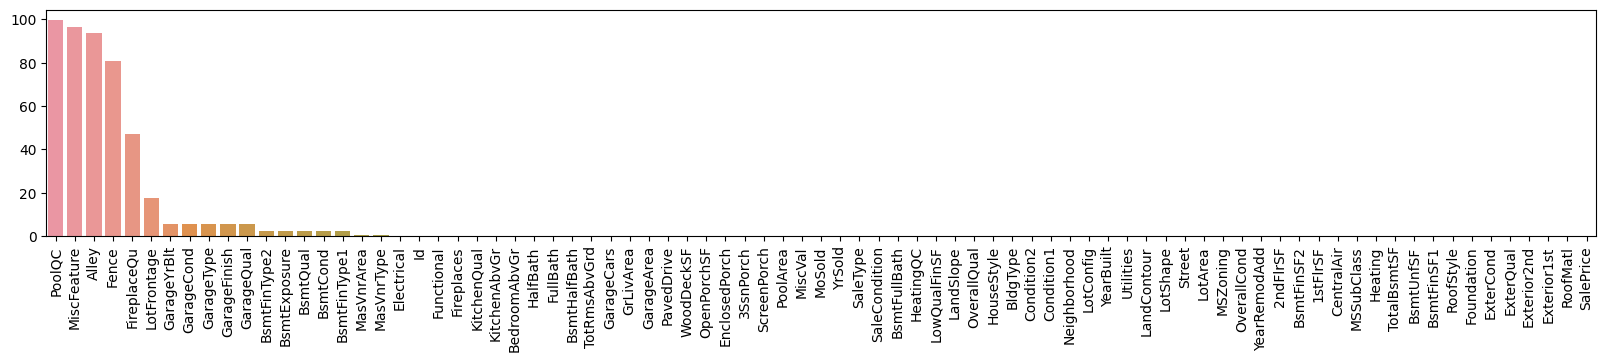

In [ ]:
plt.figure( figsize =( 20, 3), dpi = 100)
sns.barplot(y= ((df.isnull().sum()/len(df))*100).sort_values(ascending = False), x= ((df.isnull().sum()/len(df))*100).sort_values(ascending = False).index )
plt.xticks(rotation = 90);


In [ ]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [ ]:
df = df.drop(df.columns[((df.isnull().sum()/len(df))*100) > 40], axis =1)

In [ ]:
df.dropna(subset = ['MasVnrArea', 'MasVnrType'], inplace = True)

In [ ]:
for col in df.select_dtypes(exclude =[np.number]):
                           df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
for col in df.select_dtypes(include =[np.number]):
                           df[col] = df[col].fillna(df[col].median())

# **FEATURE SELECTION**

In [ ]:
df.columns.sort

<bound method Index.sort of Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',



The dataset has a lot of features. So, lets drop some of them. First lets drop them due to the presence of two columns of the same kind :
1. OverallQual  cause its related to OverallCond


2. YearBuilt cause YearRemodAdd

3. ExterQual cause ExterCond

4. GarageCars cause GarageArea

5. GarageQual cause GarageCond

The features which are irrelevant were also removed:

'Street', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Condition1', 'Heating', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageYrBlt, 'MiscVal', 'MoSold'








In [ ]:
df.drop(['OverallQual' , 'YearBuilt' , 'ExterQual'  , 'GarageYrBlt' , 'GarageCars' , 'GarageQual' , 'MiscVal' , 'MoSold', 'Id', 'Street', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Condition1', 'Heating', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
 'BsmtFinType2', 'BsmtUnfSF', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'LotFrontage'], axis = 1, inplace = True)

In [ ]:
df.shape

(1452, 51)

The columns ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'YrSold'] were removed cause of their low correlation(<0.4%) with the target.

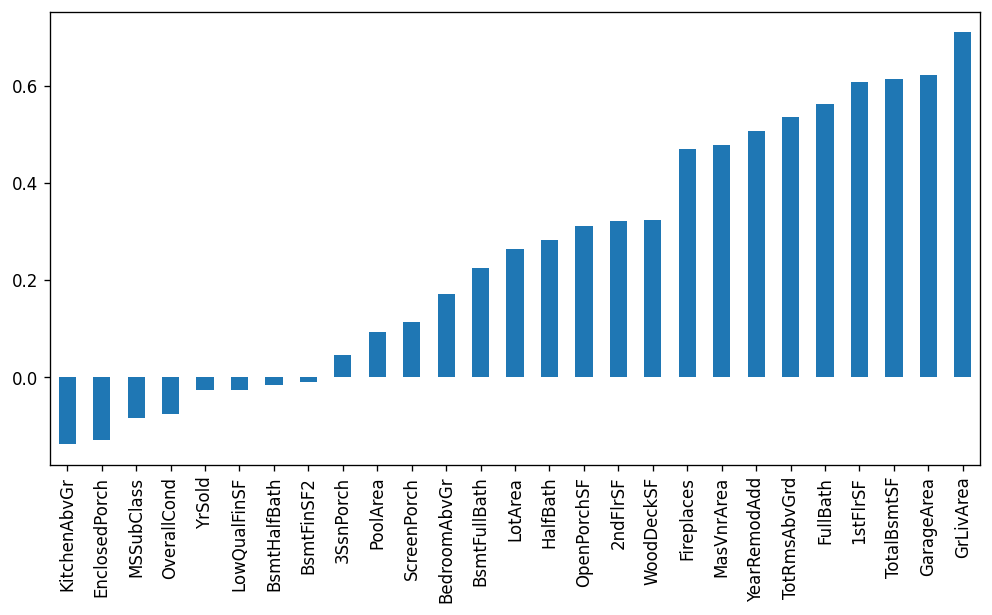

In [ ]:
plt.figure(figsize=(10,5),dpi=120)
df.corr()['SalePrice'].sort_values().drop('SalePrice').plot(kind = 'bar')

In [ ]:
drop = []
for col in df.select_dtypes(include = [np.number]):

  if (abs(df[col].corr(df['SalePrice'])) < 0.04) == True:
              d = col
              drop.append(d)

drop


['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'YrSold']

In [ ]:
df.drop(drop, axis = 1, inplace = True)

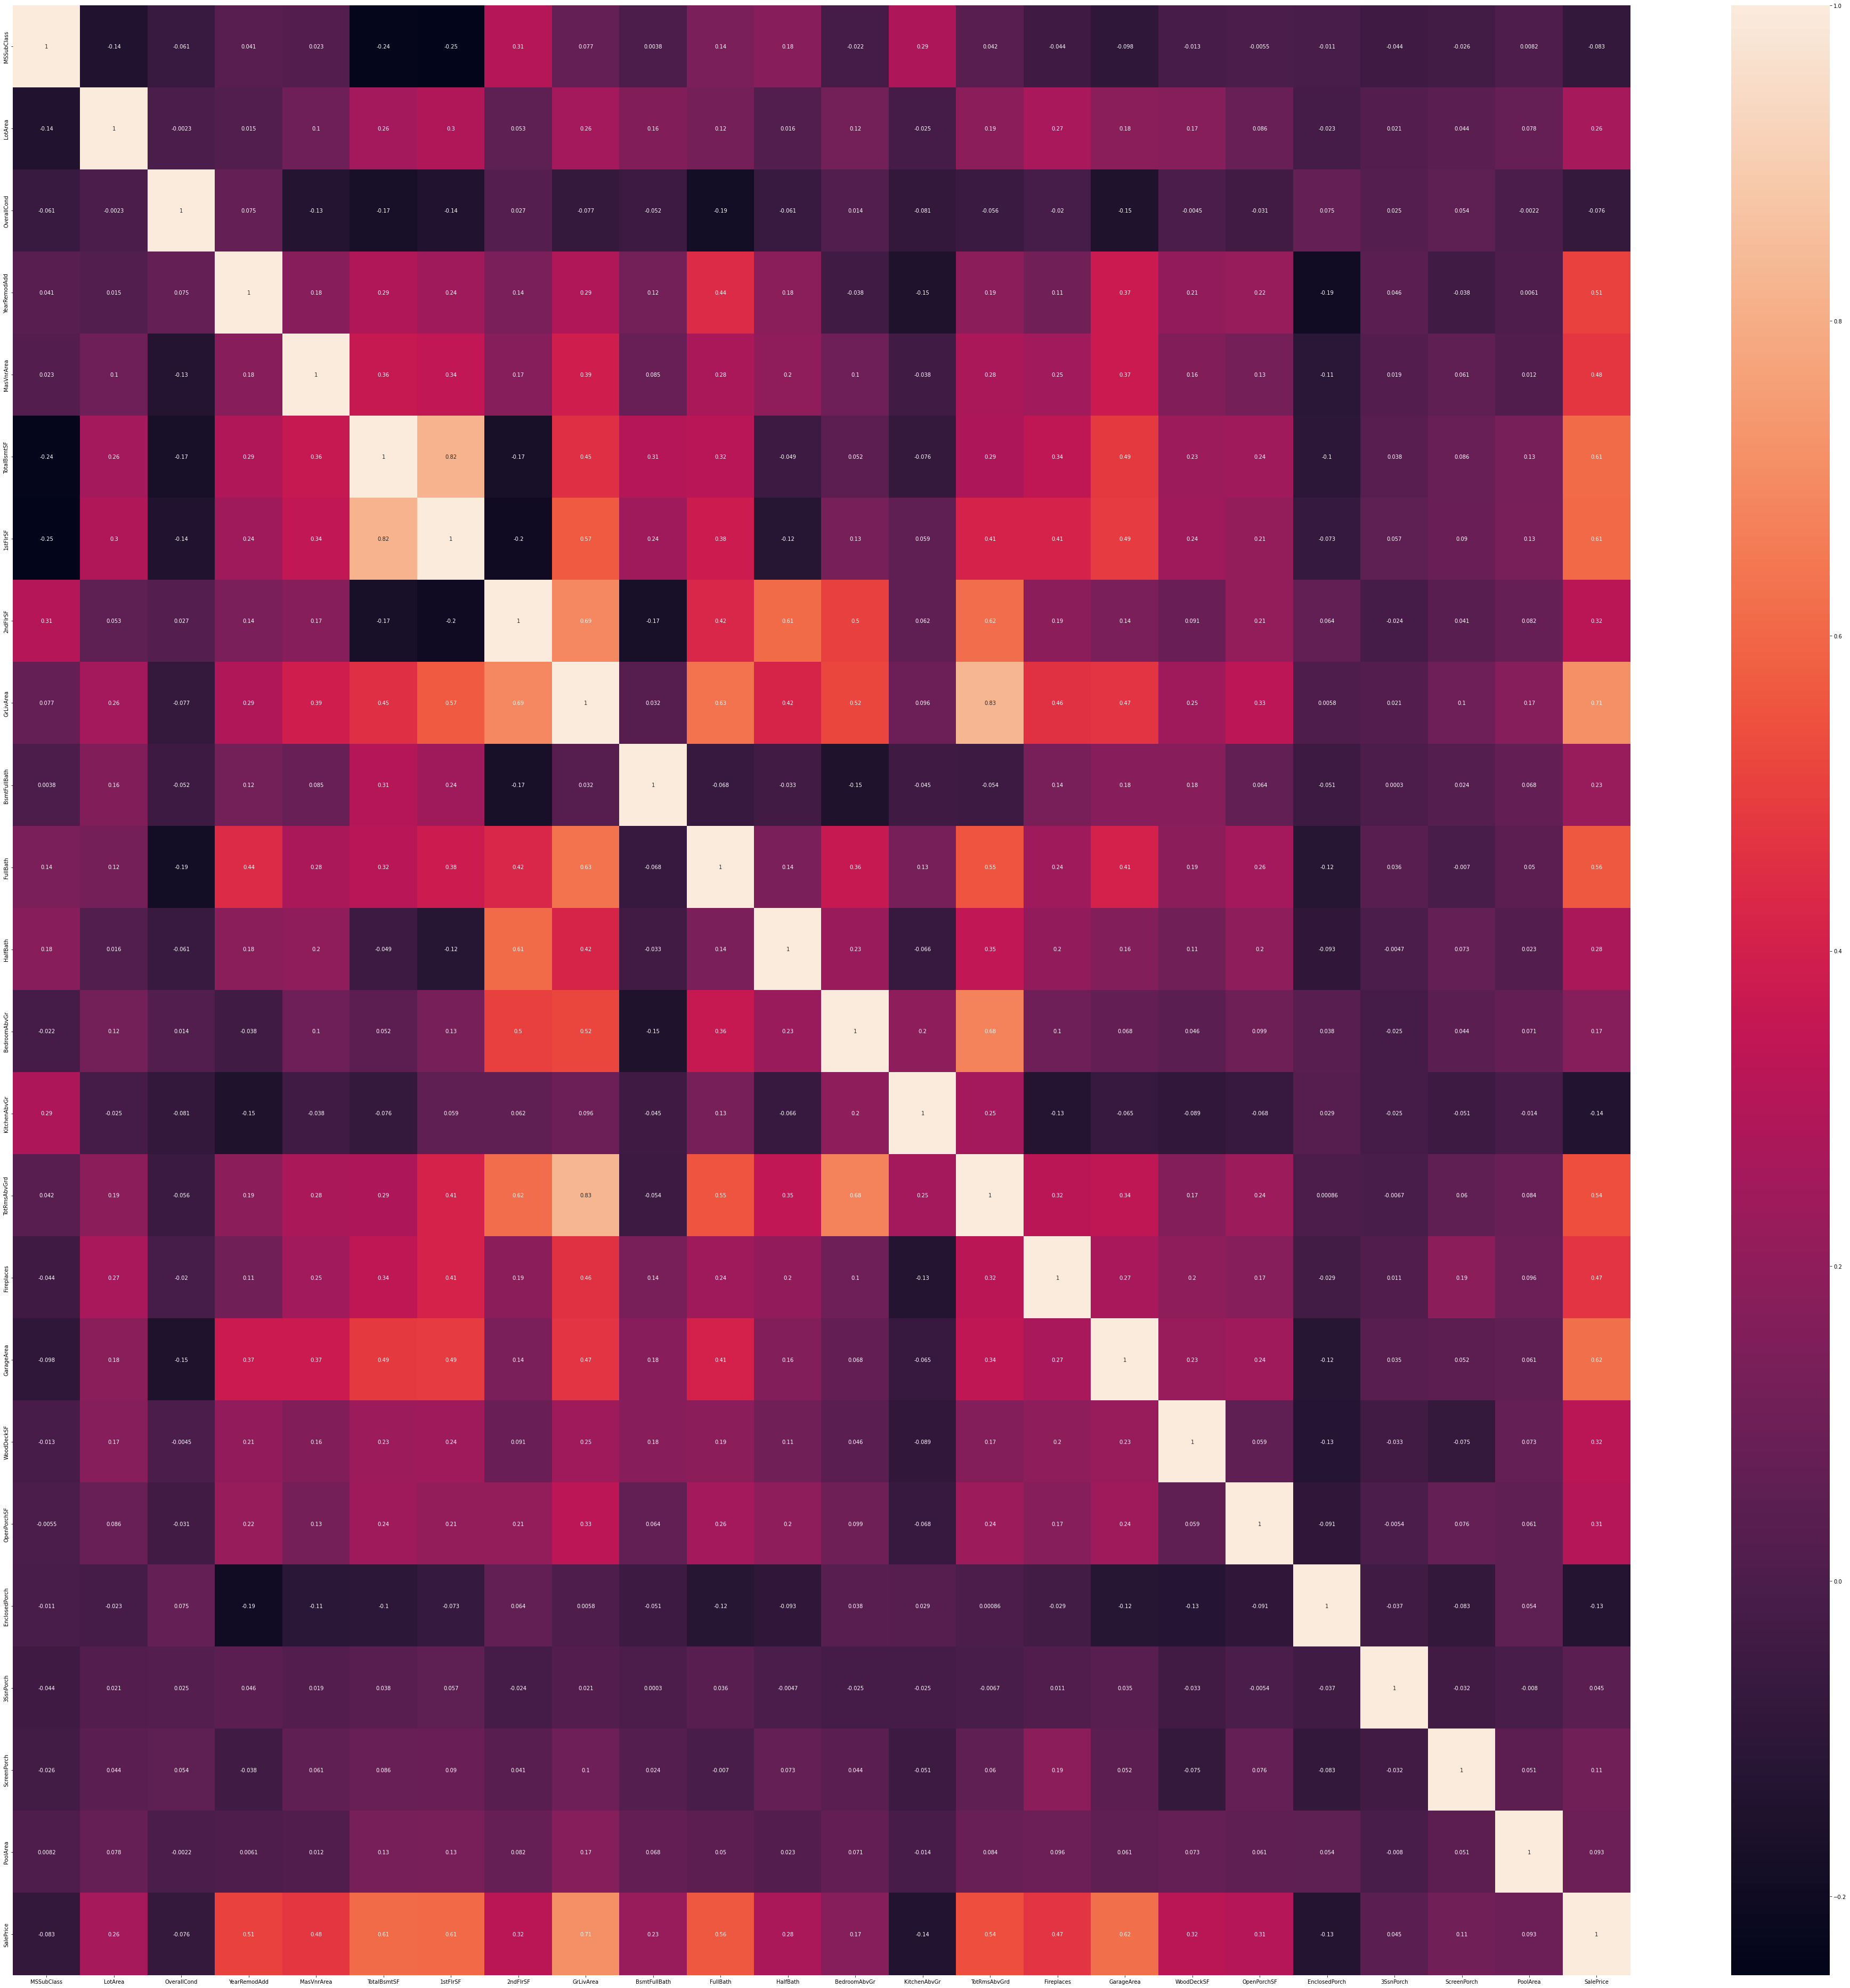

In [ ]:
plt.figure( figsize = (68,68))
sns.heatmap(df.corr(), annot = True)
plt.show(block = True)

In [ ]:
col_corr= []
corr_matrix = df.corr()
for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if(corr_matrix.iloc[i,j]> 0.8):
      colname= corr_matrix.columns[i]
      col_corr.append(colname)

In [ ]:
col_corr

['1stFlrSF', 'TotRmsAbvGrd']

In [ ]:
df.drop(col_corr, axis =1, inplace = True)

In [ ]:
df.shape

(1452, 45)

# **EXPLARATORY DATA ANALYSIS**

In [ ]:
 ! pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 4.5 MB/s 


                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.



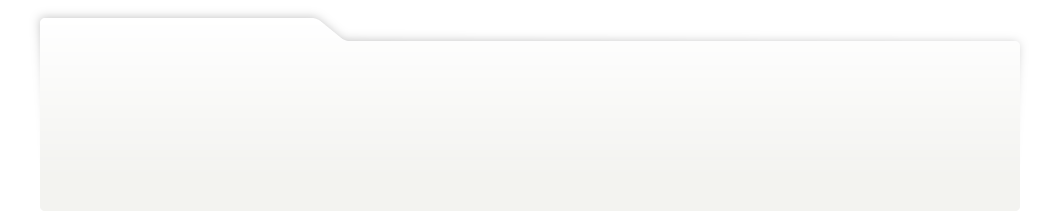
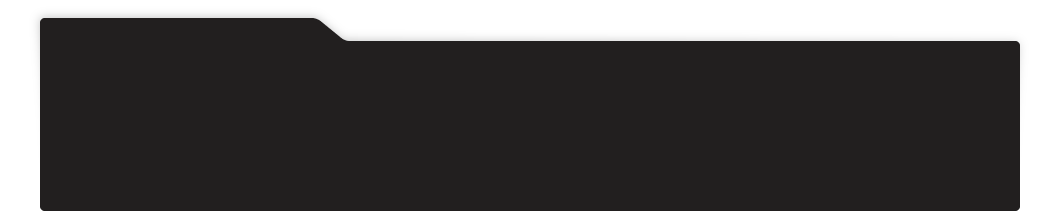
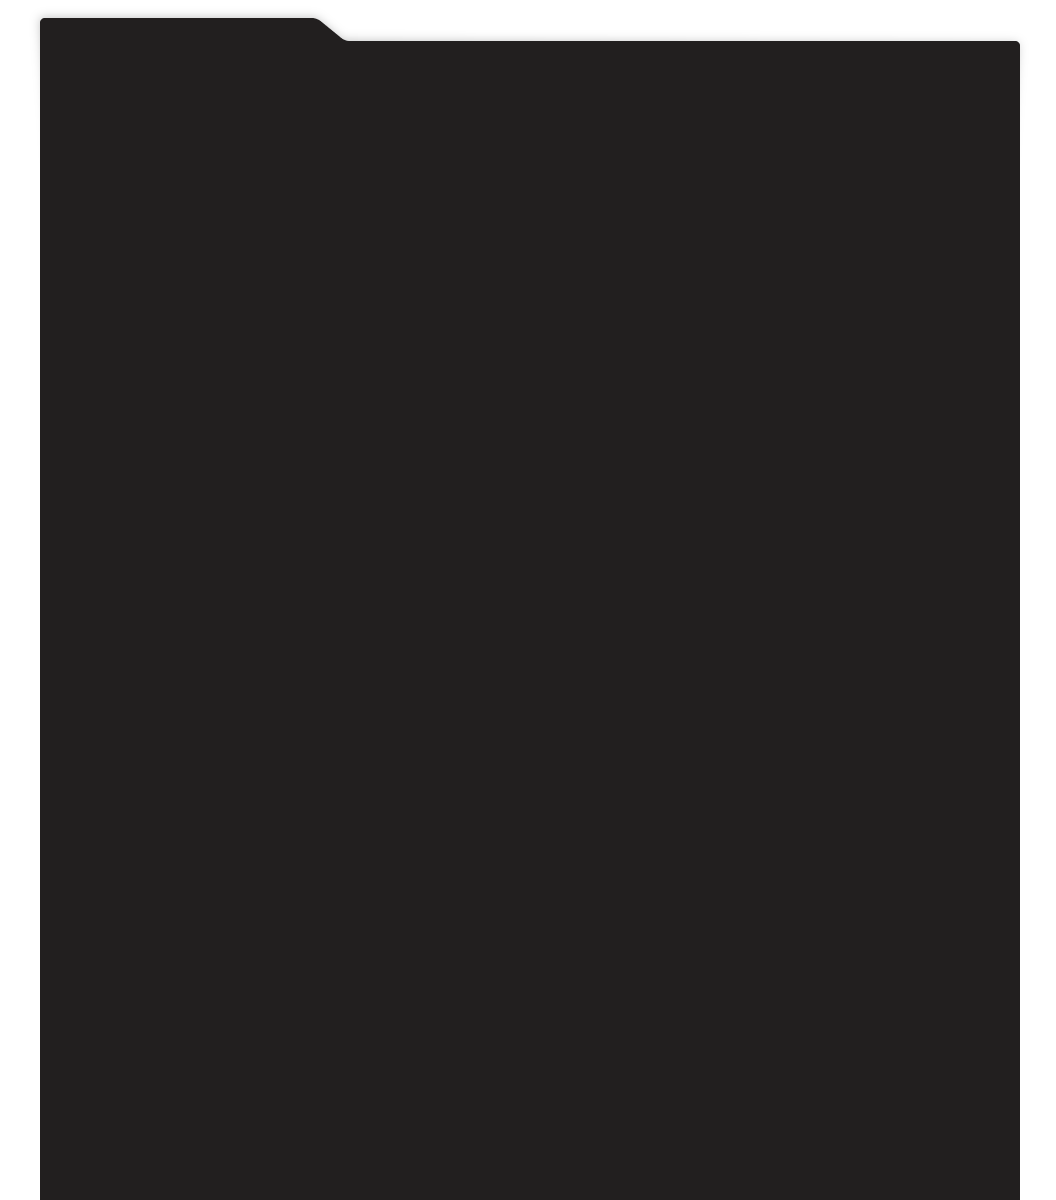
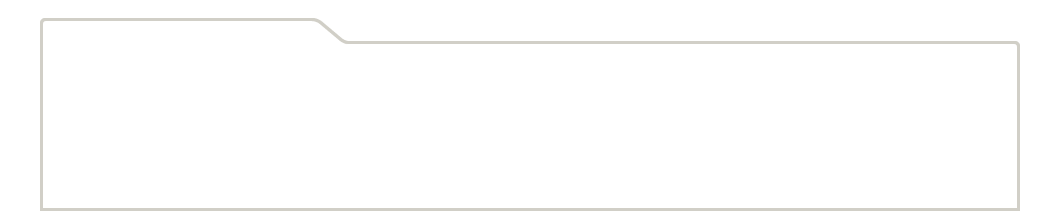
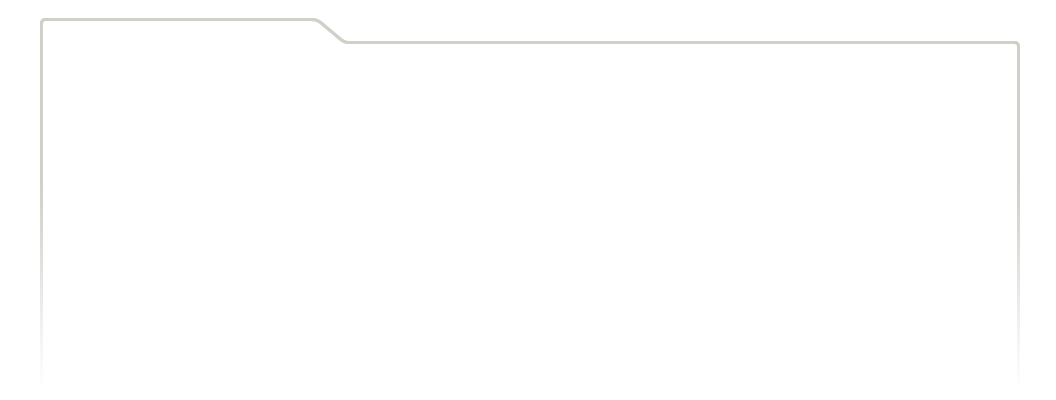
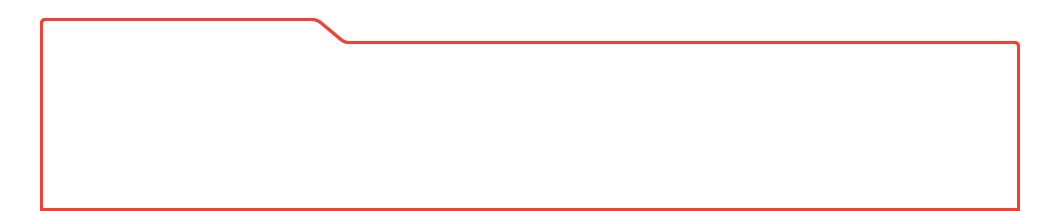
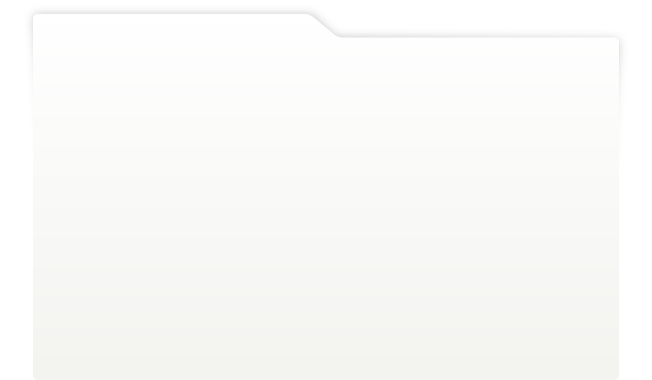
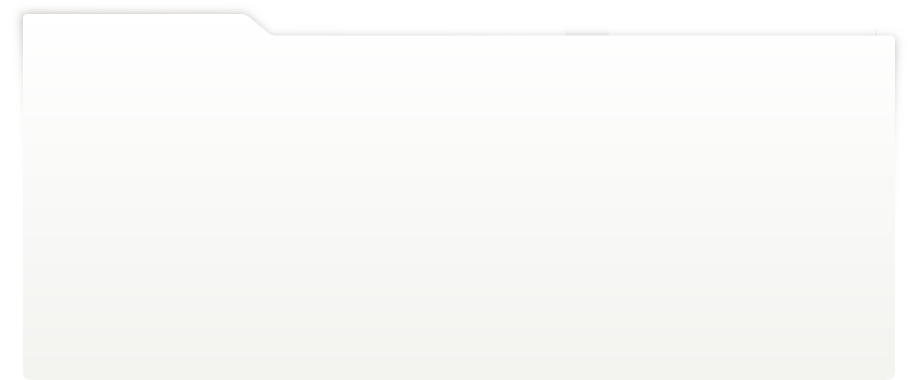
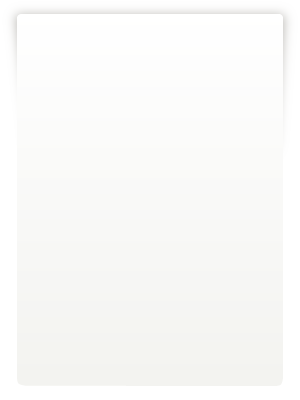
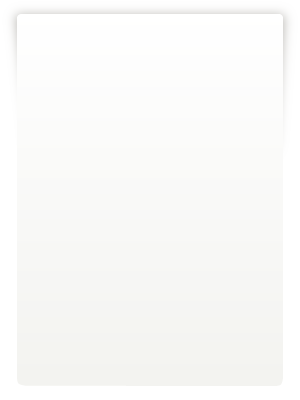
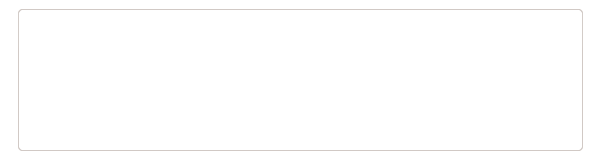
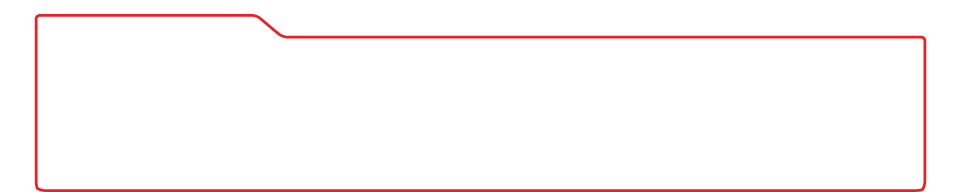
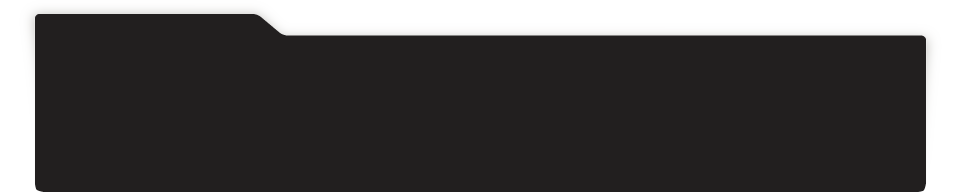
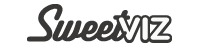
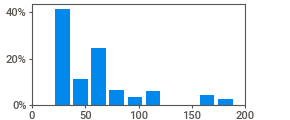
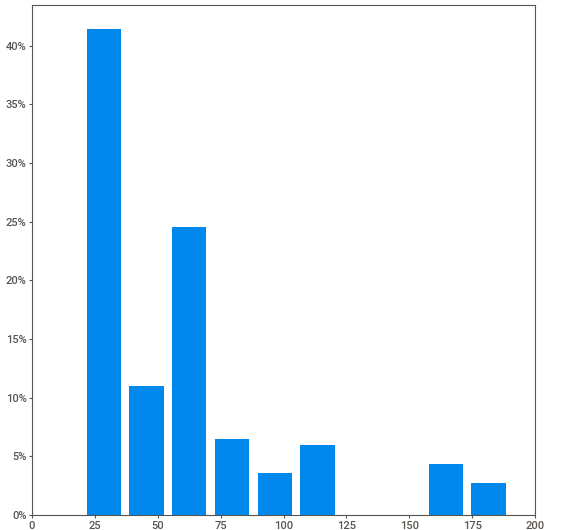
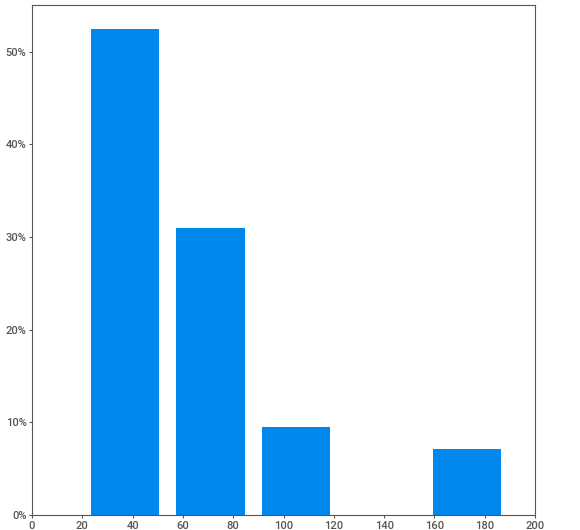
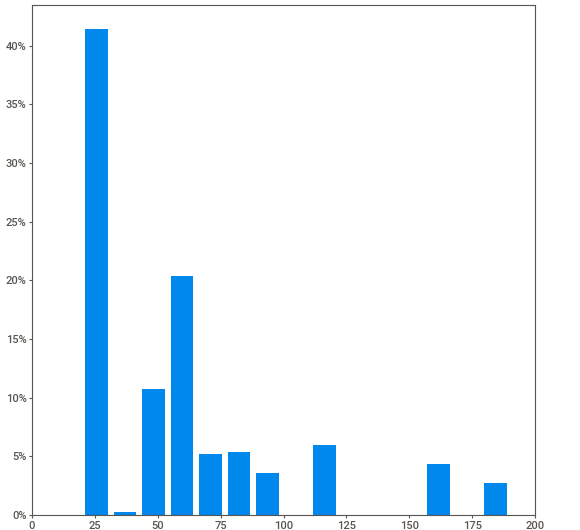
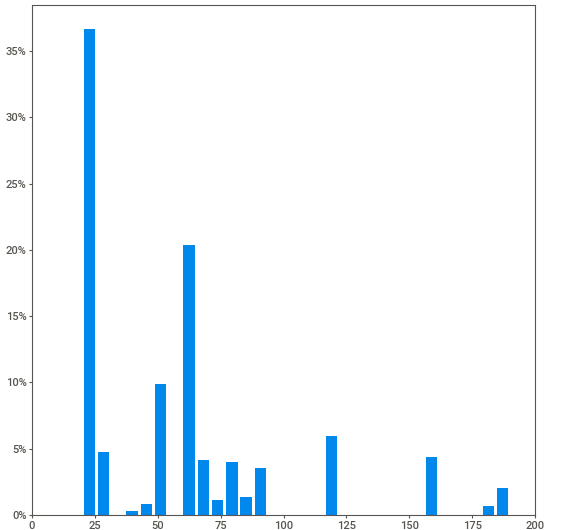
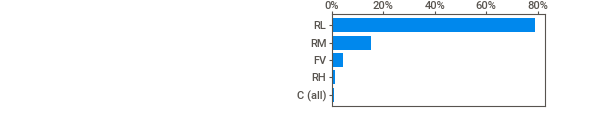
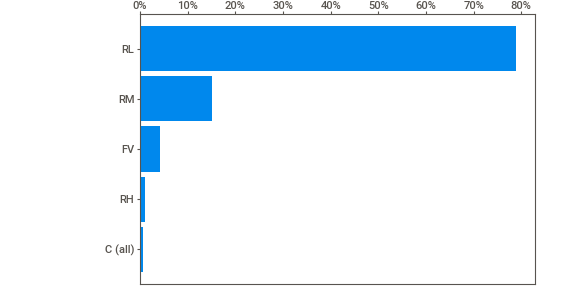
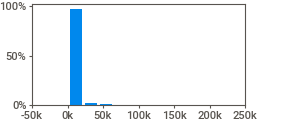
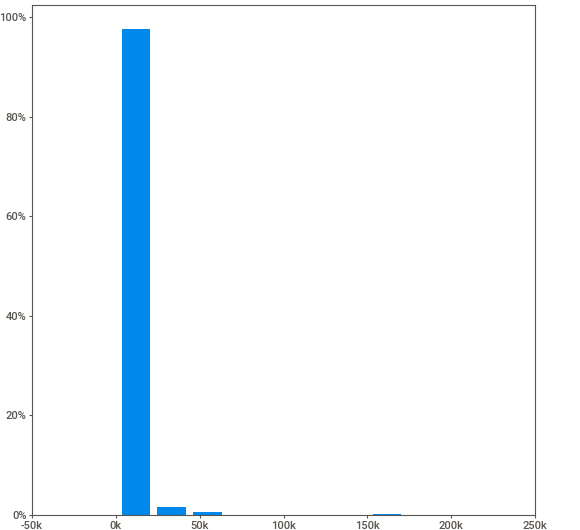
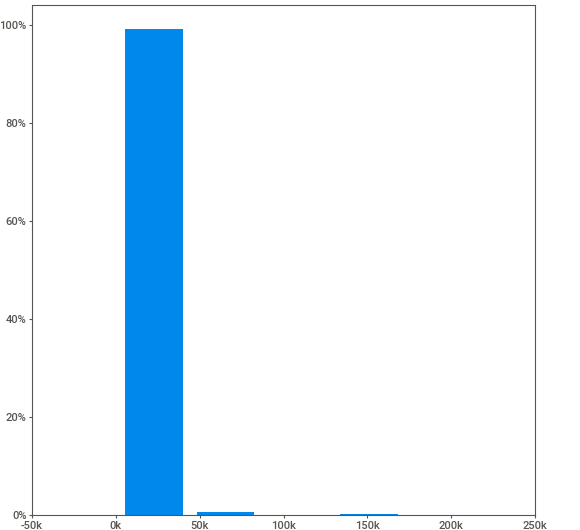
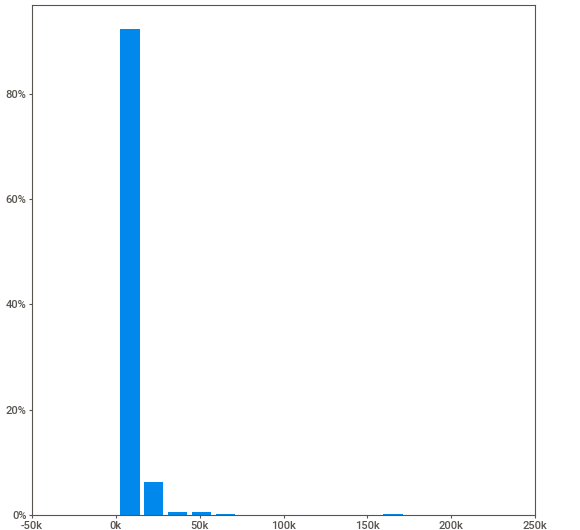
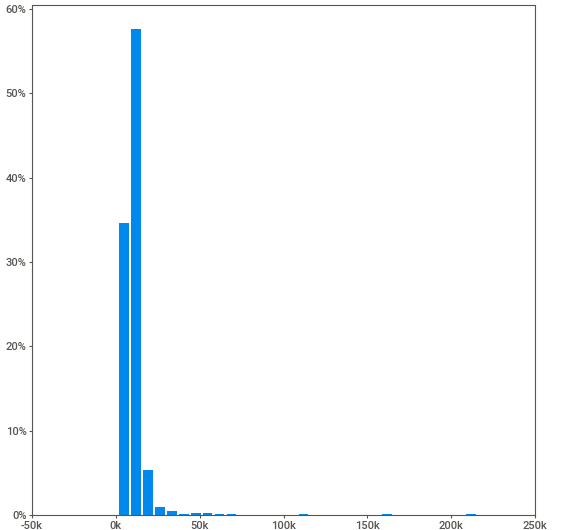
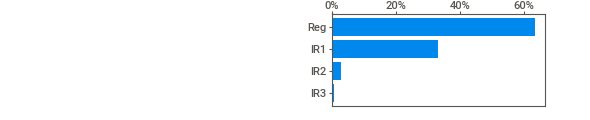
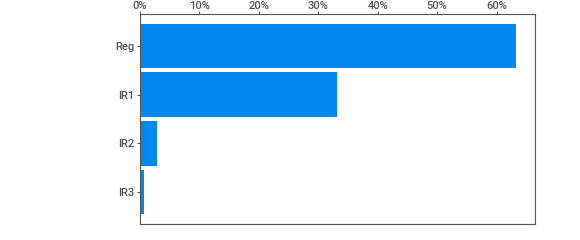
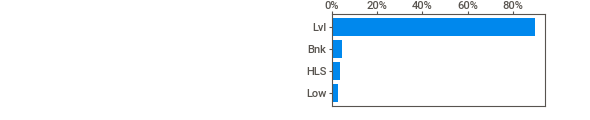
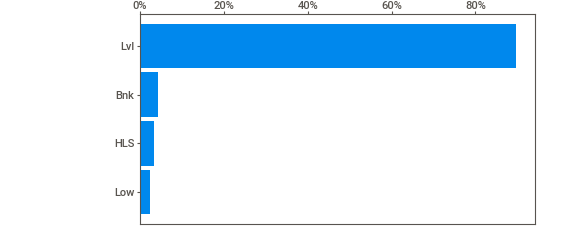
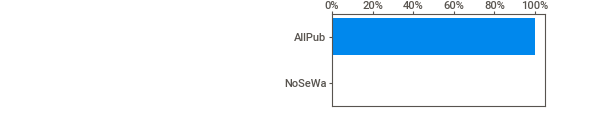
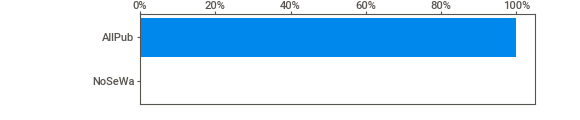
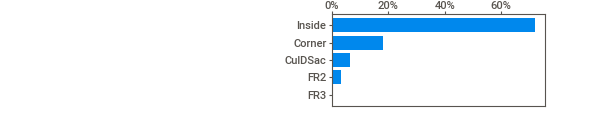
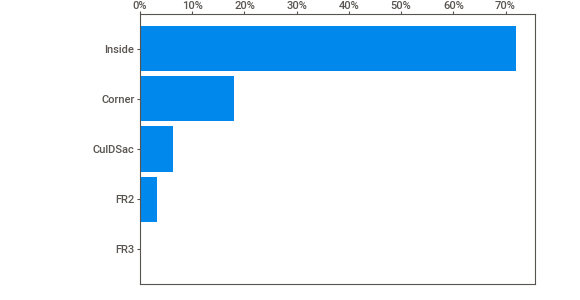
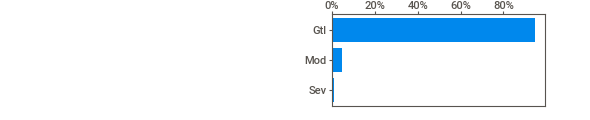
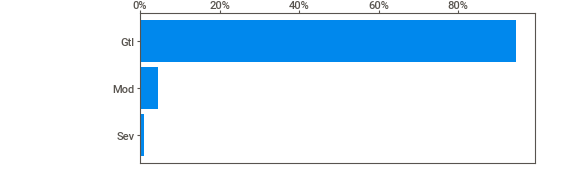
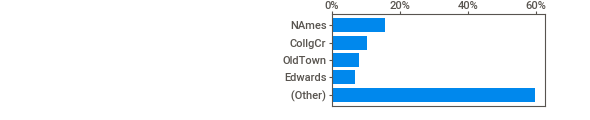
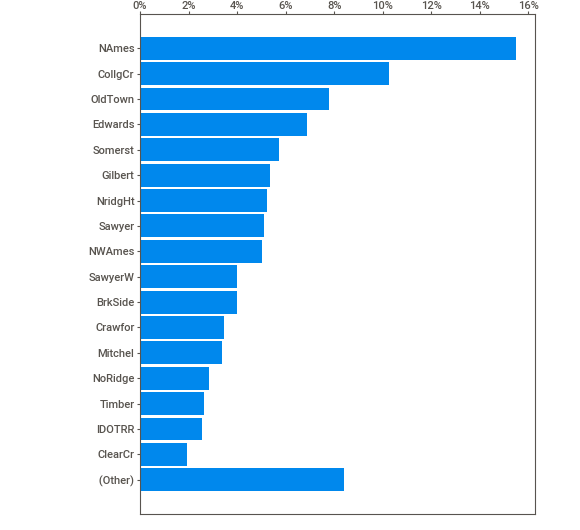
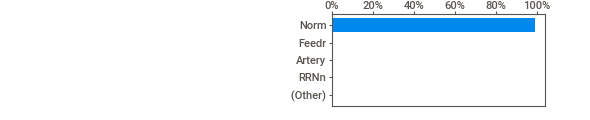
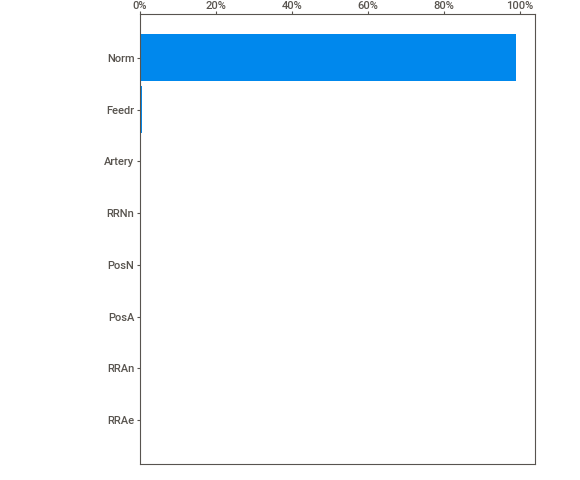
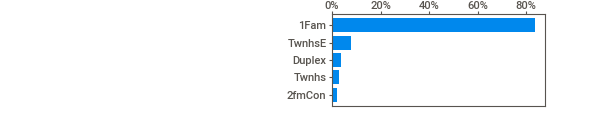
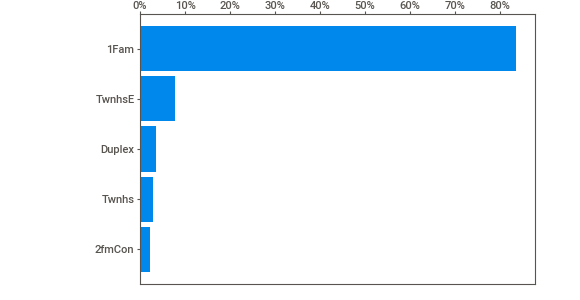
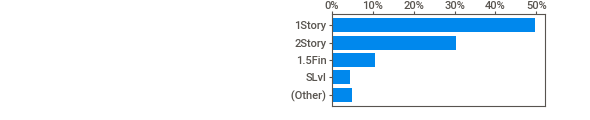
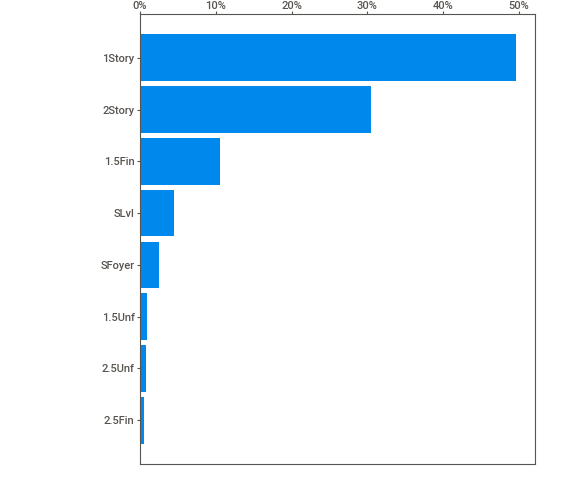
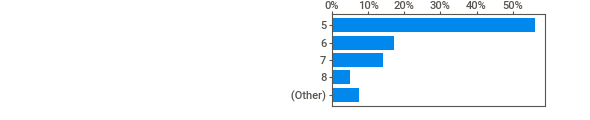
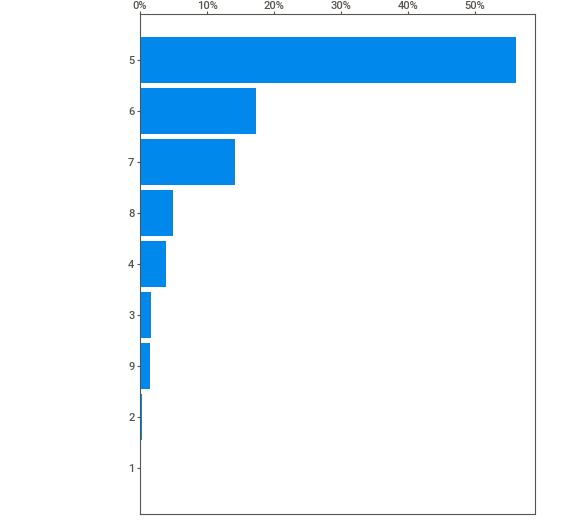
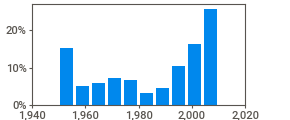
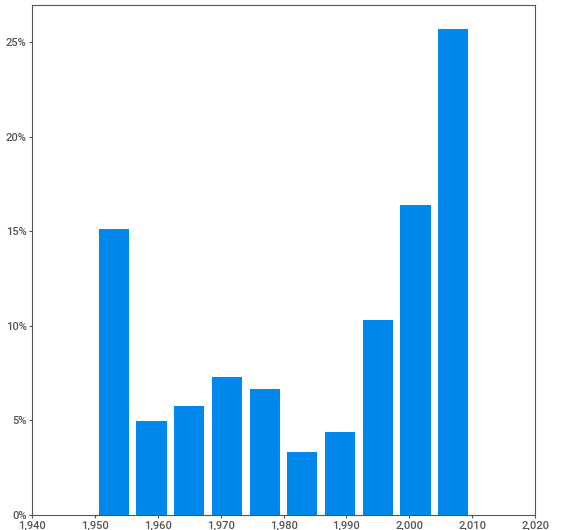
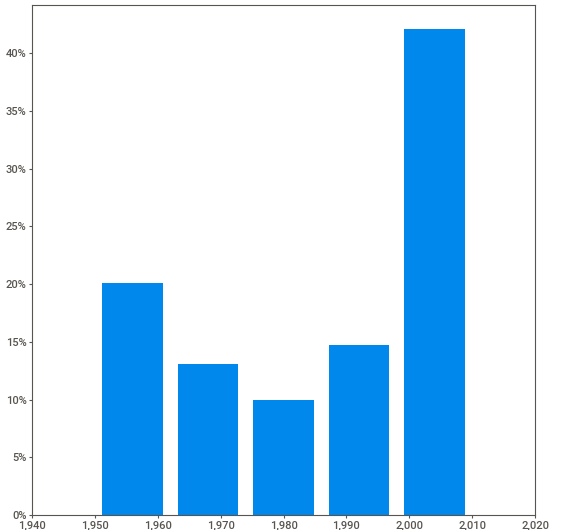
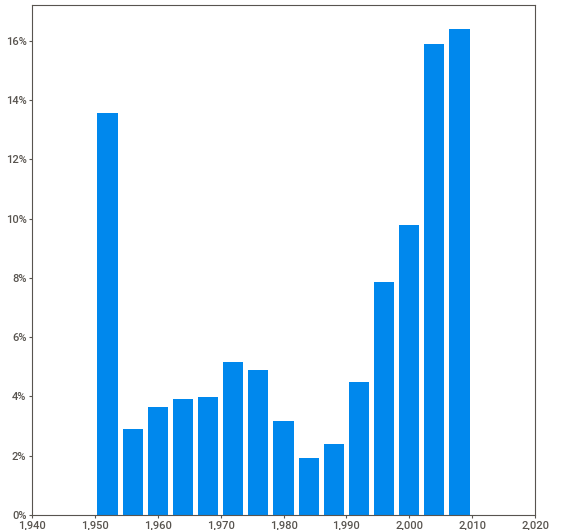
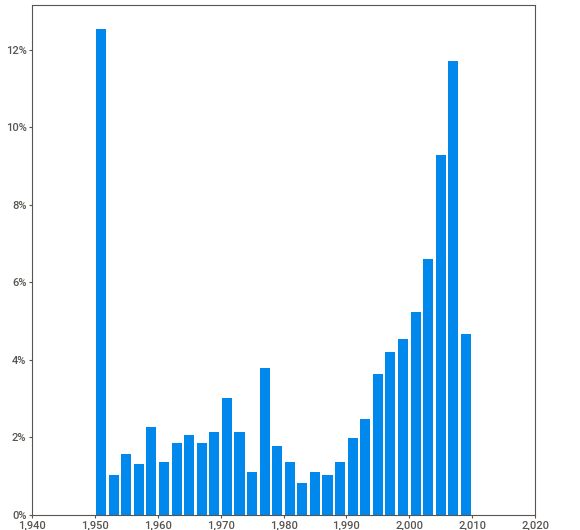
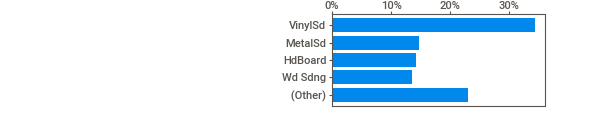
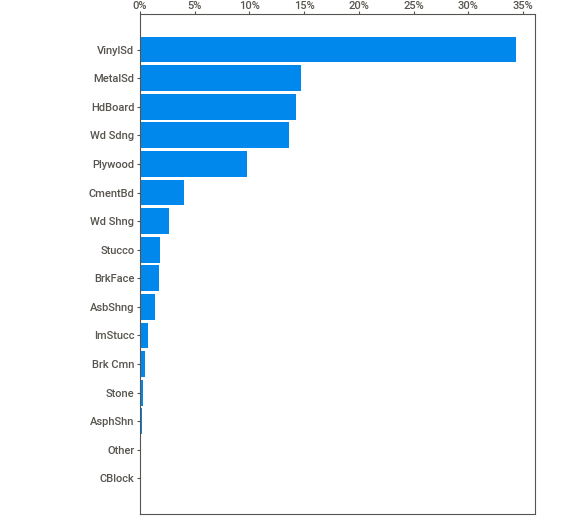
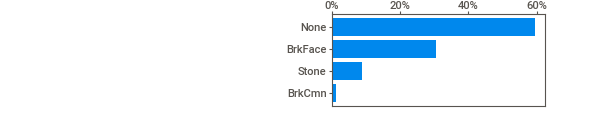
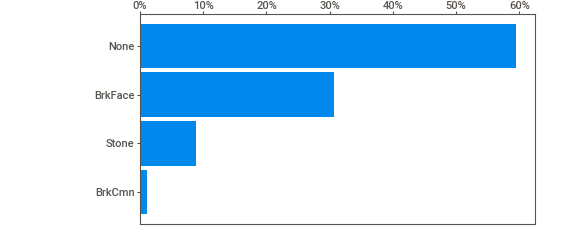
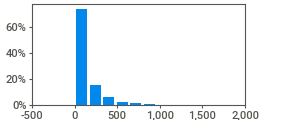
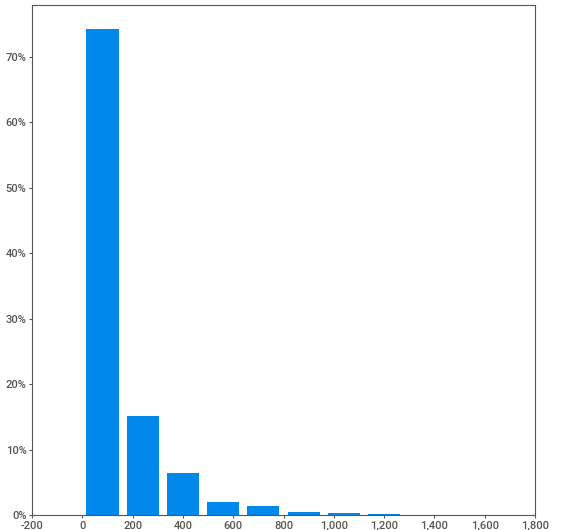
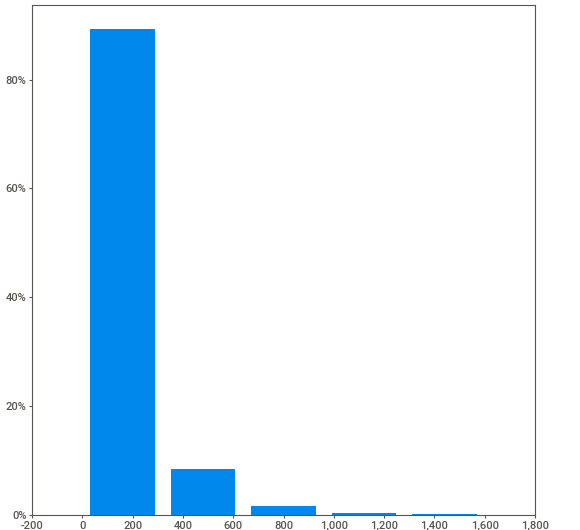
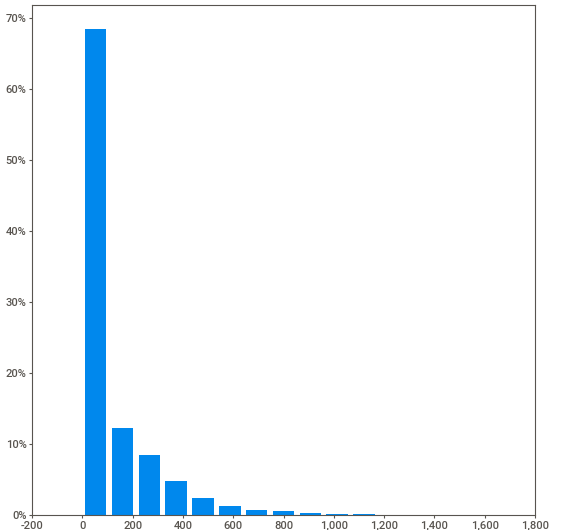
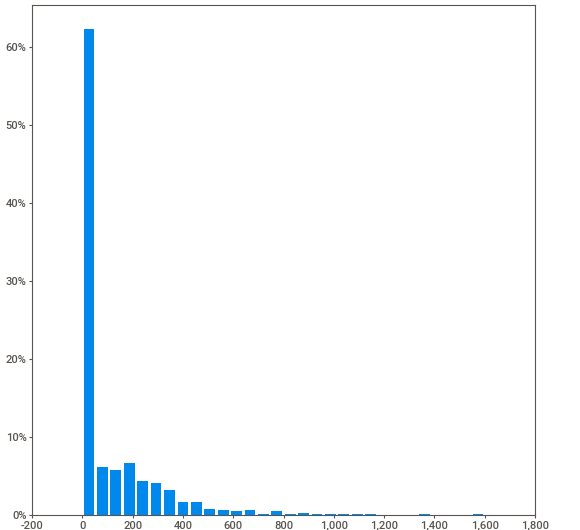
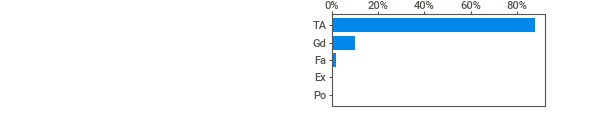
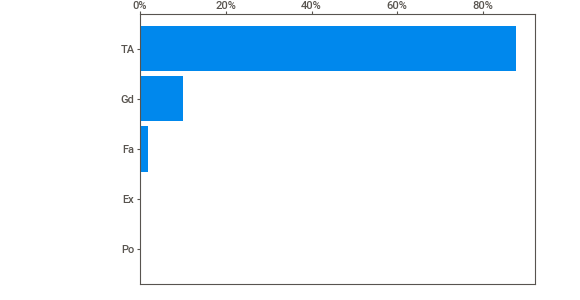
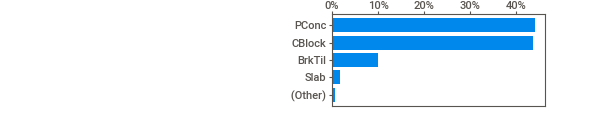
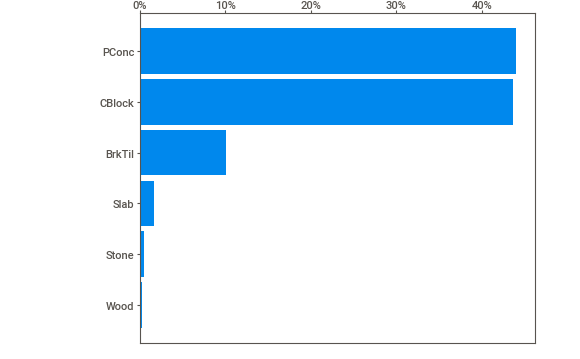
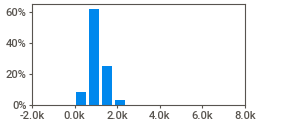
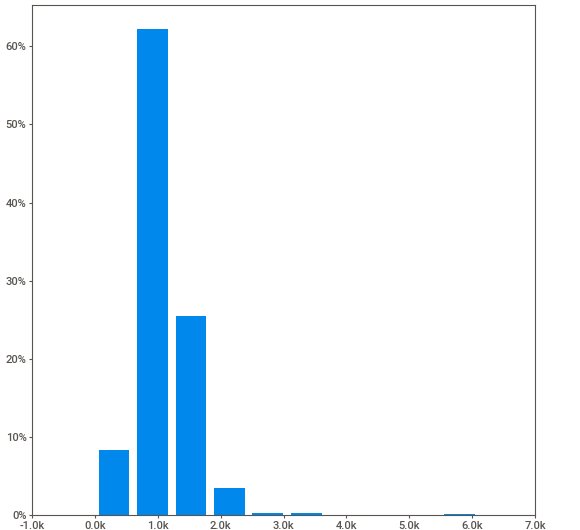
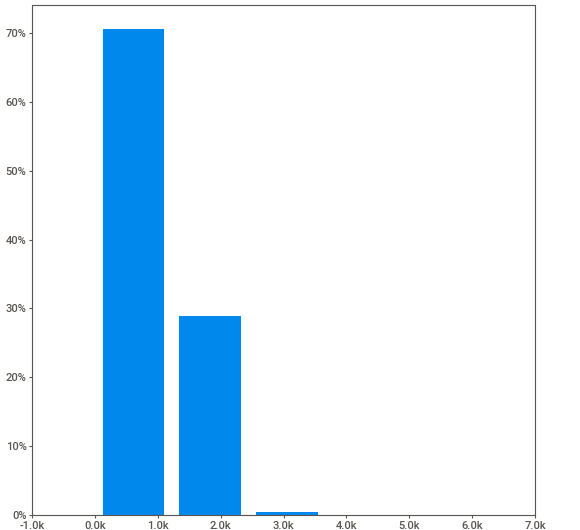
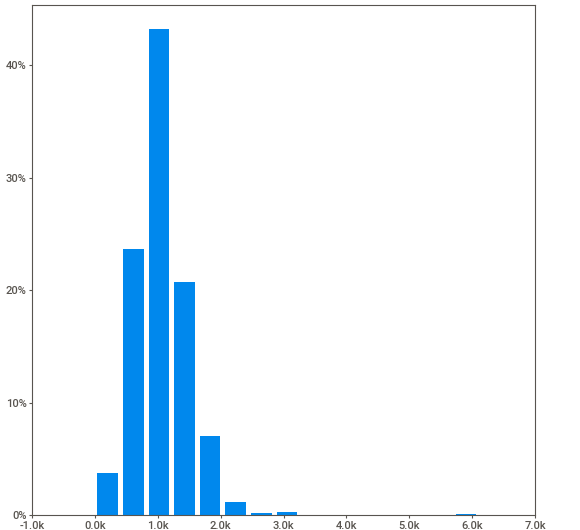
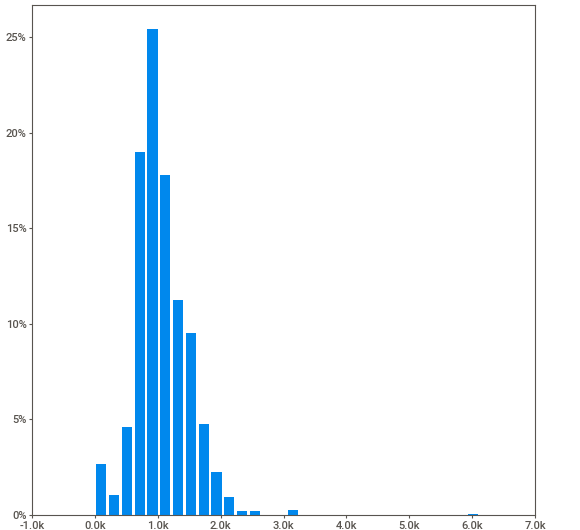
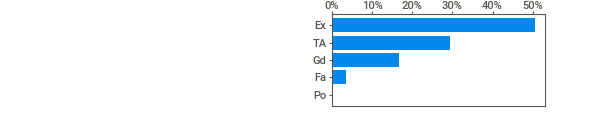
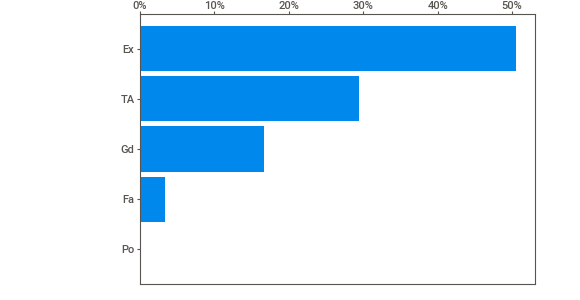
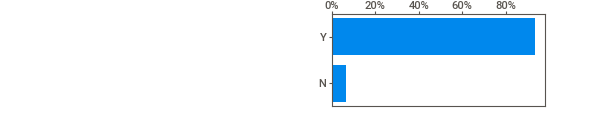
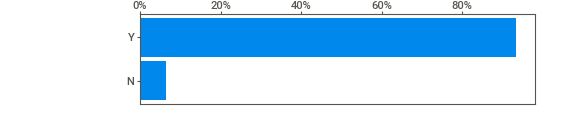
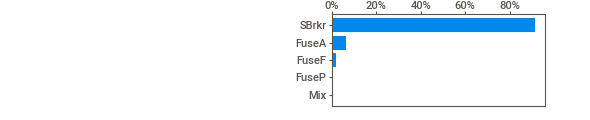
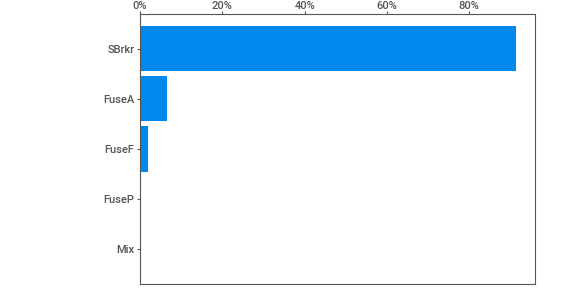
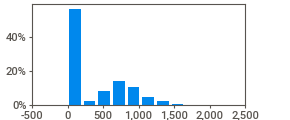
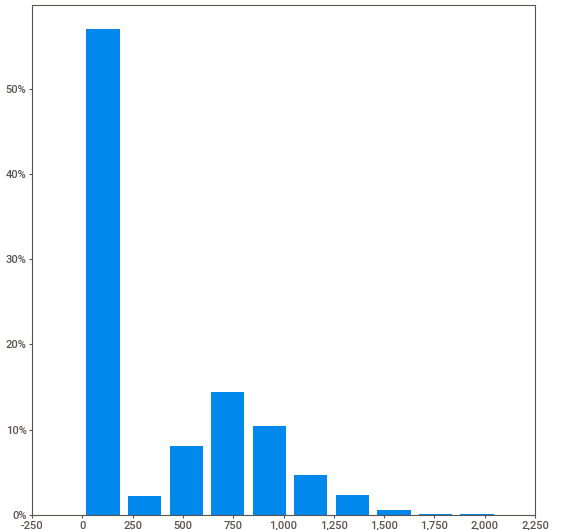
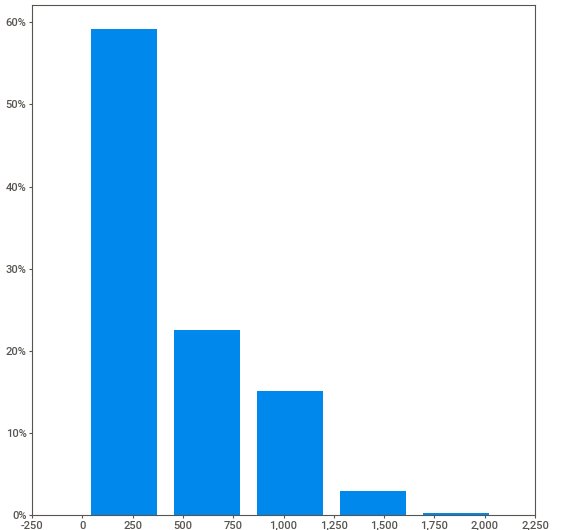
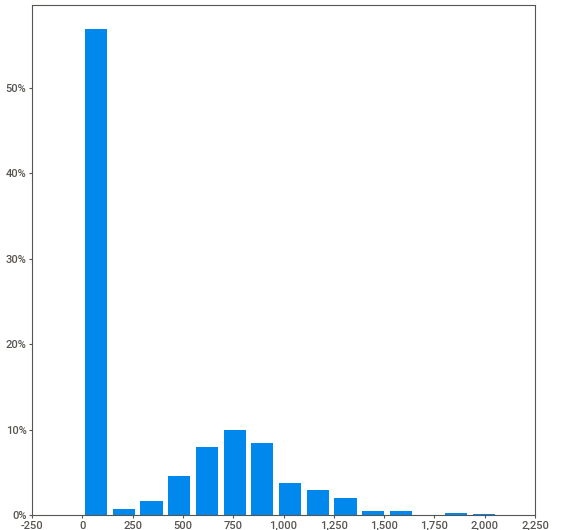
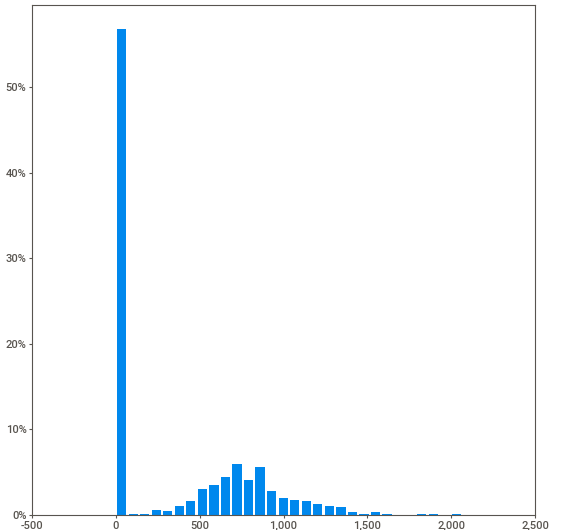
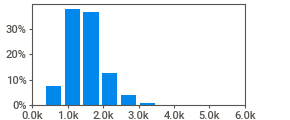
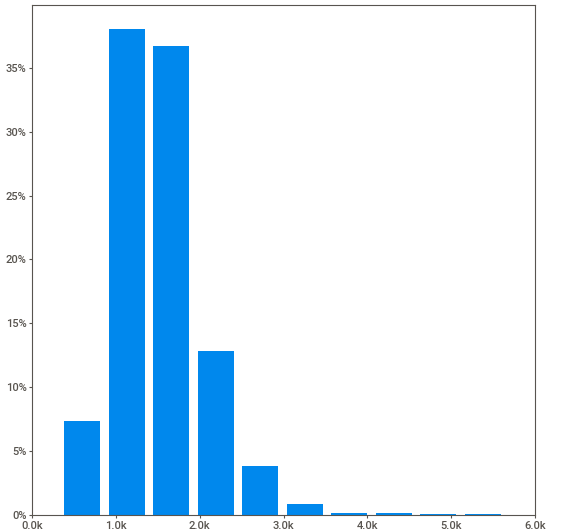
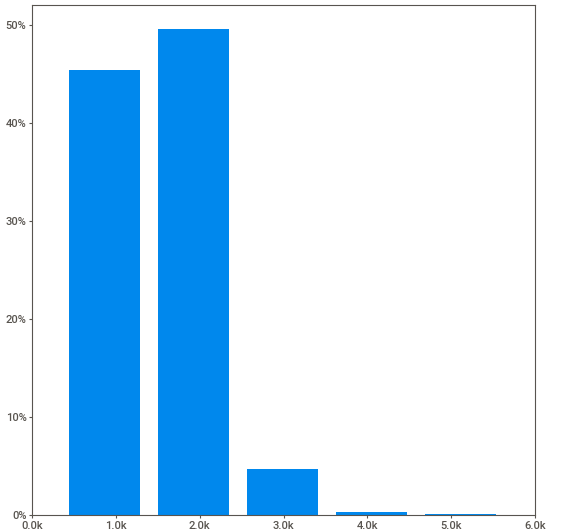
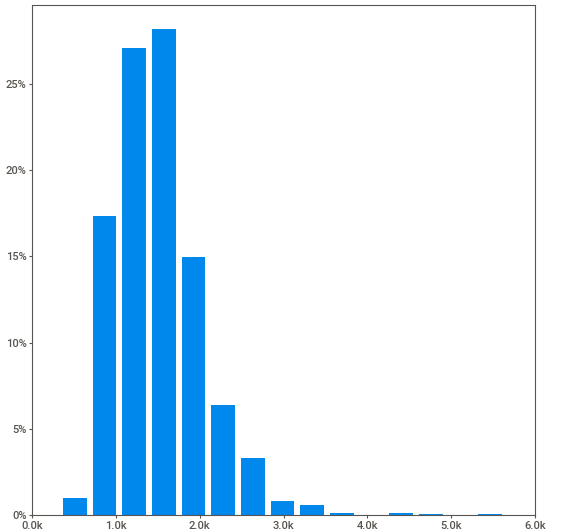
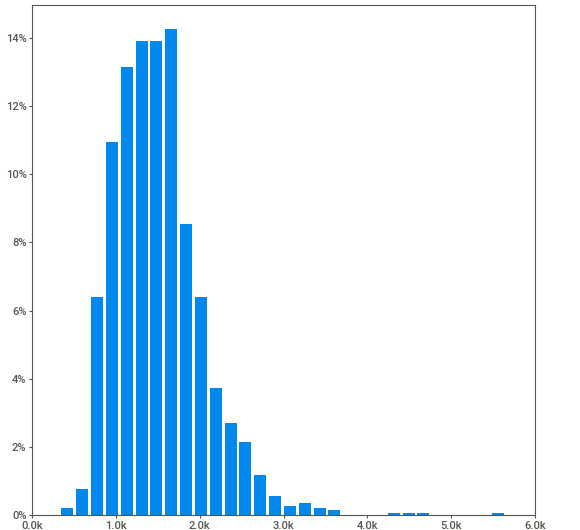
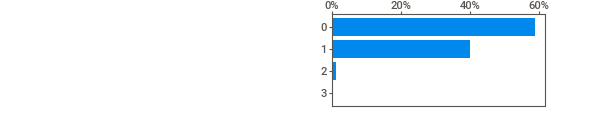
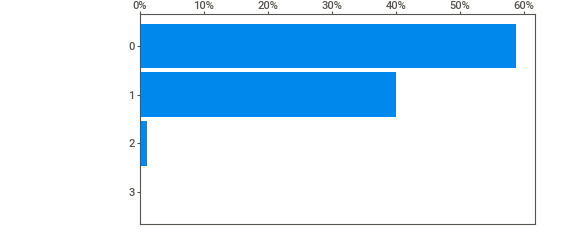
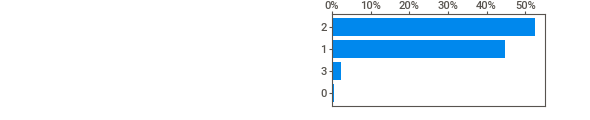
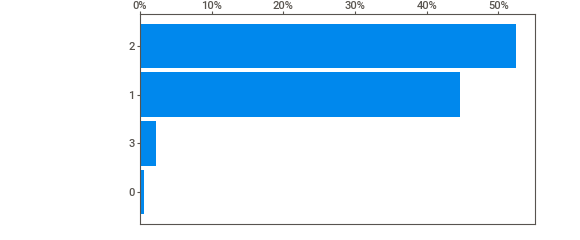
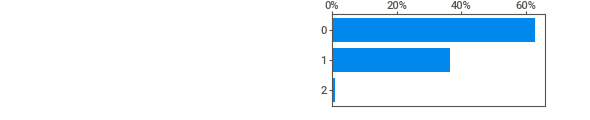
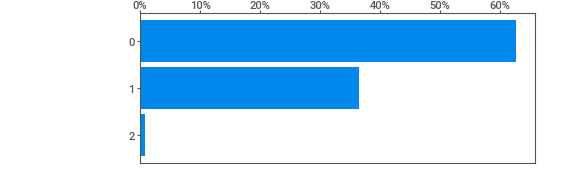
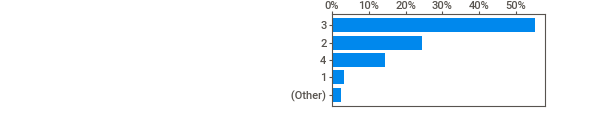
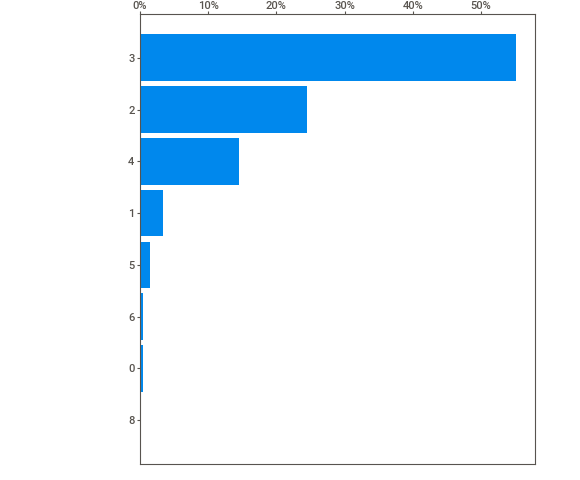
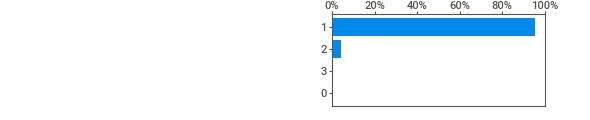
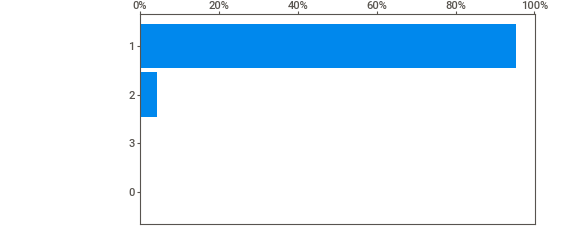
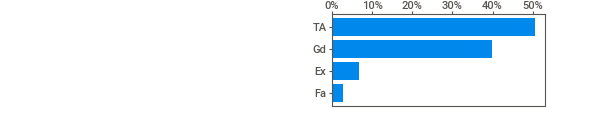
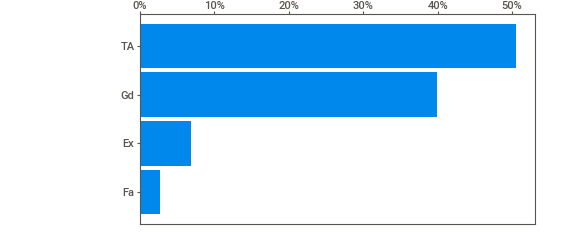
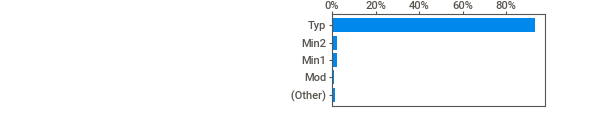
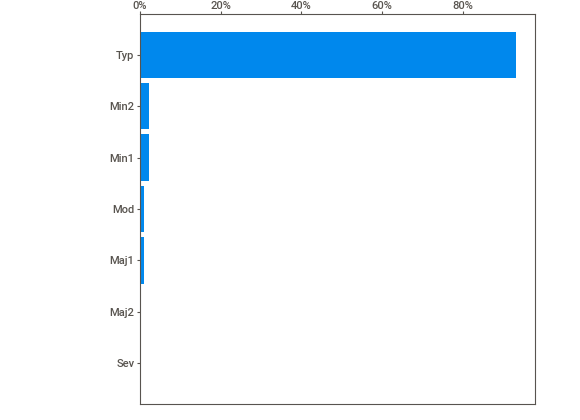
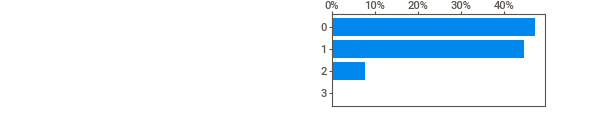
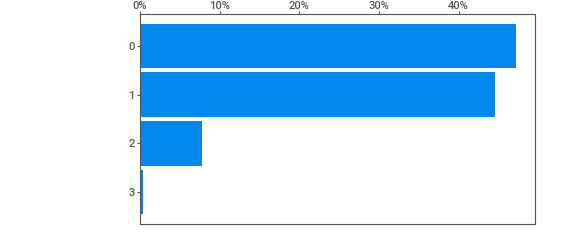
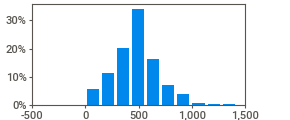
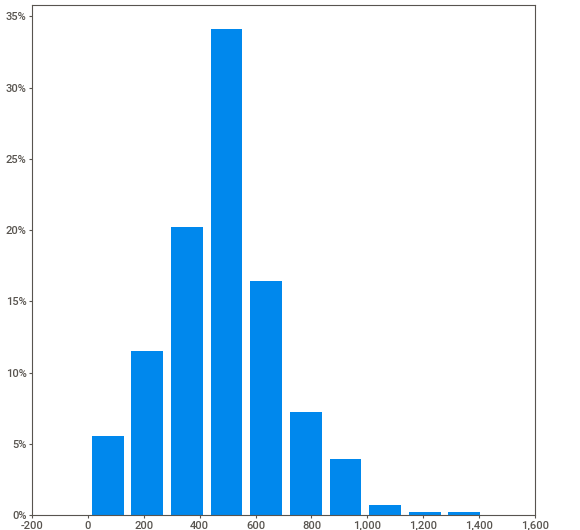
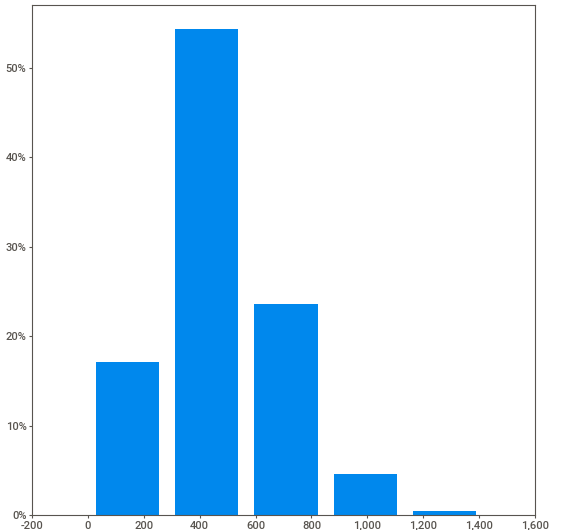
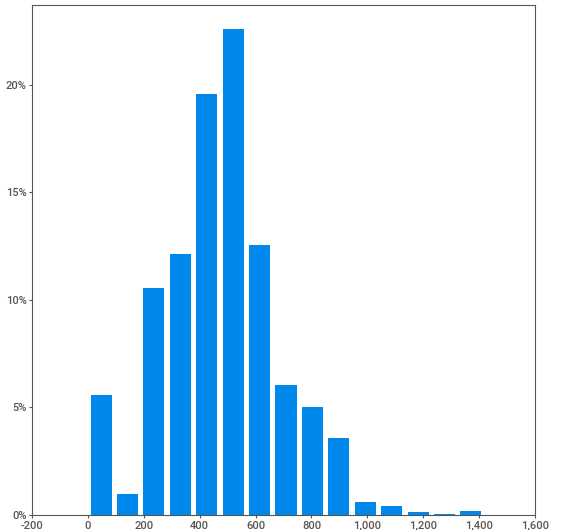
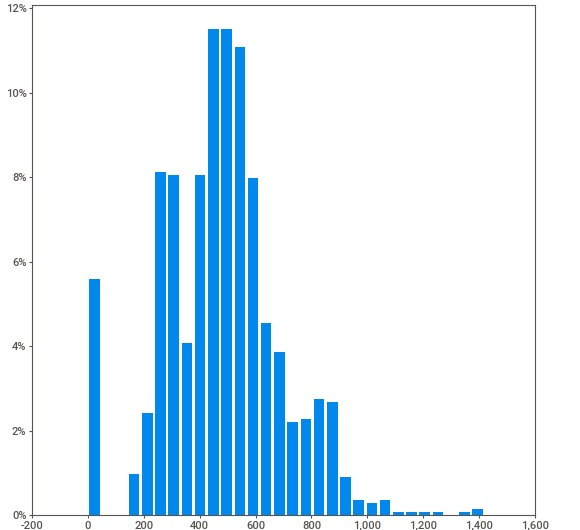
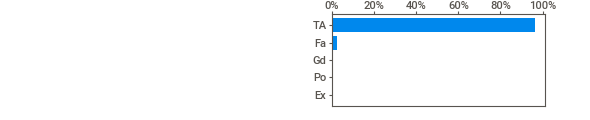
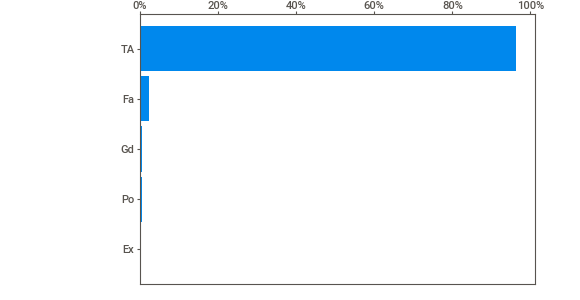
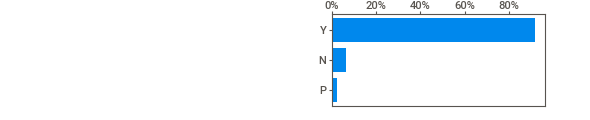
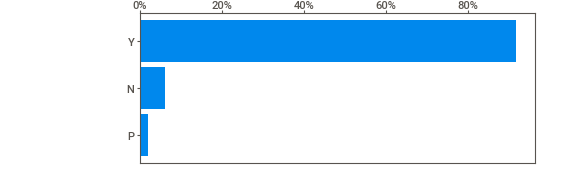
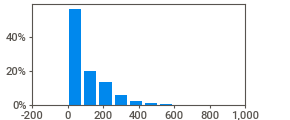
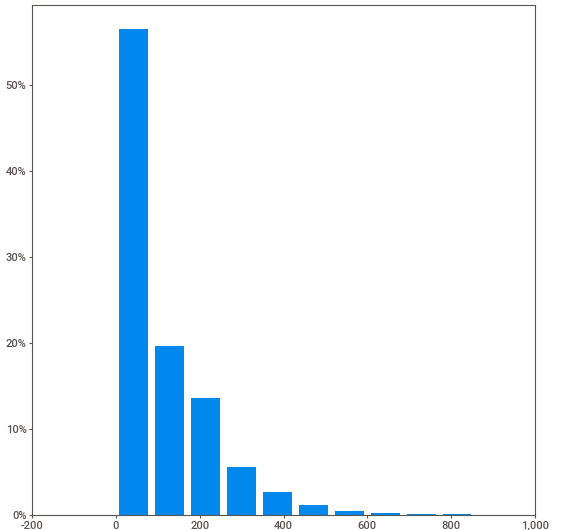
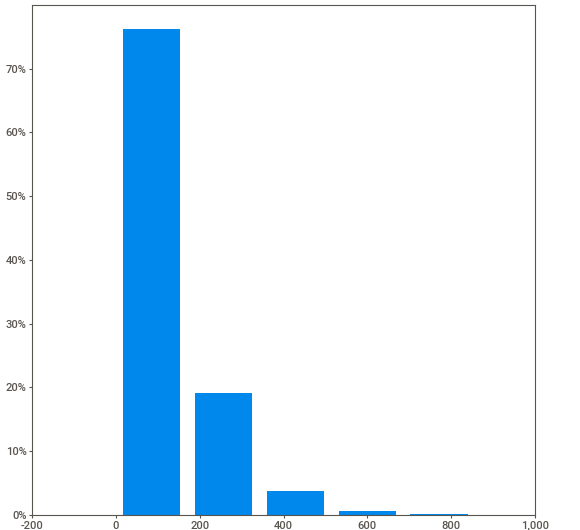
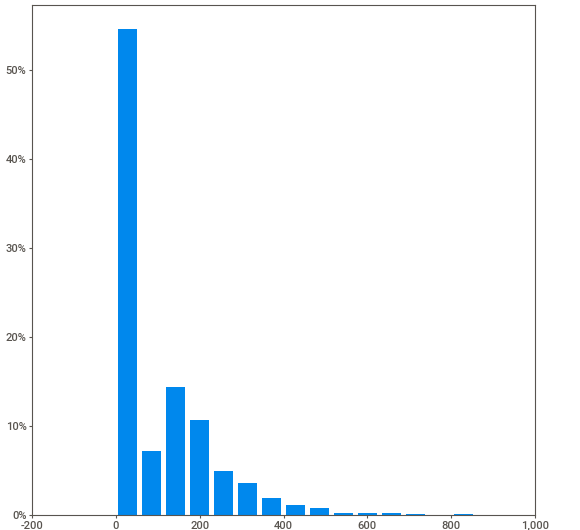
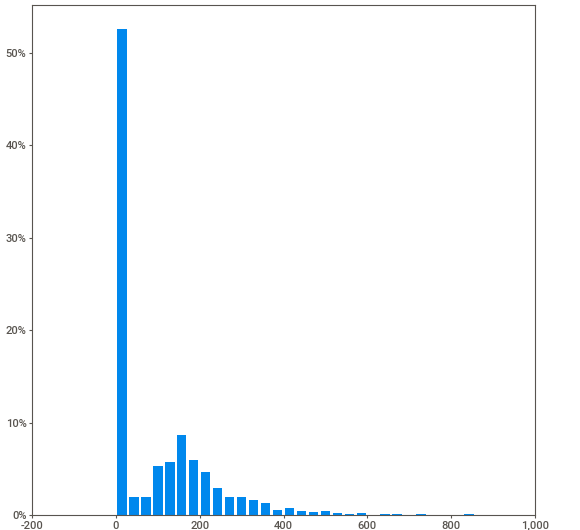
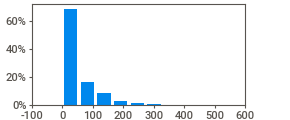
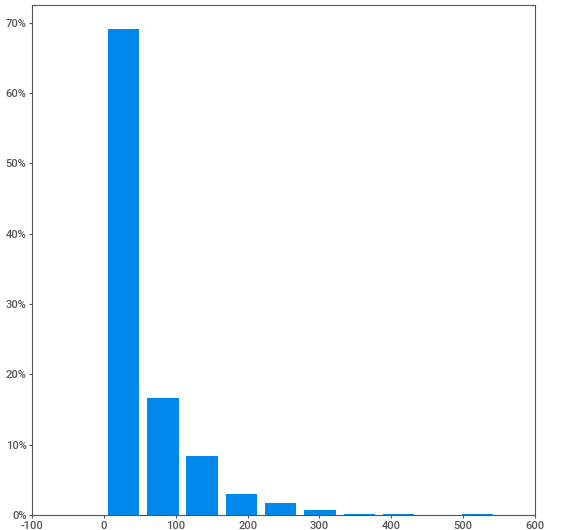
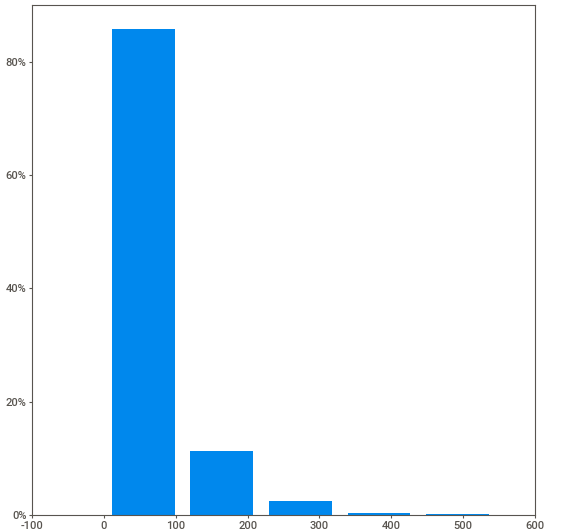
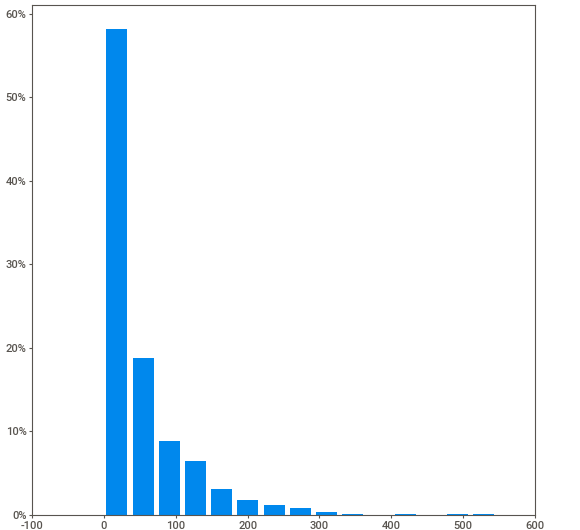
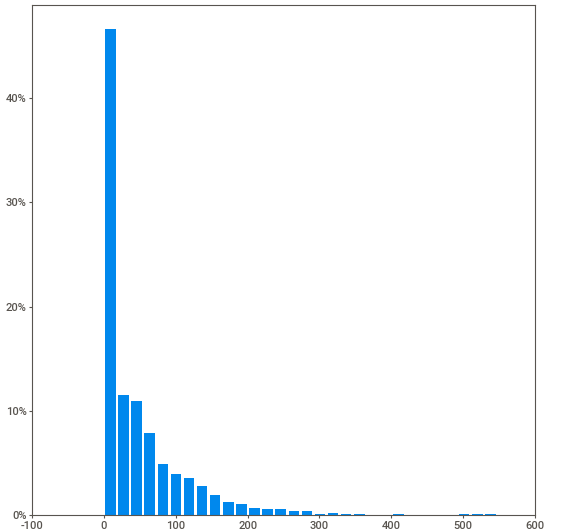
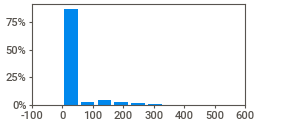
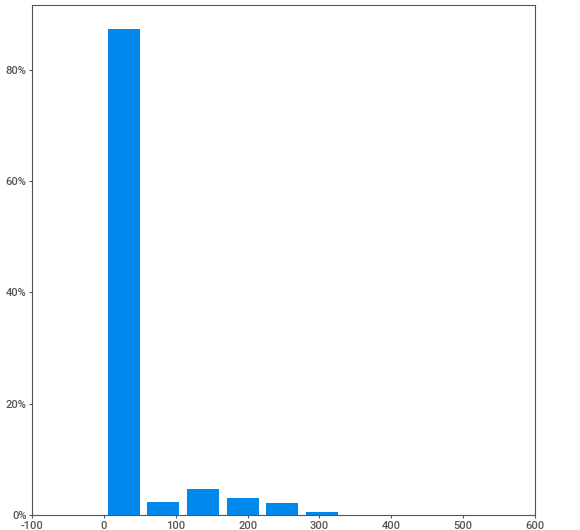
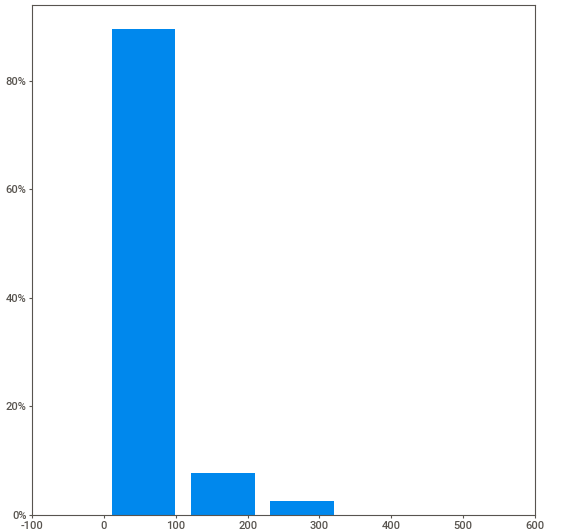
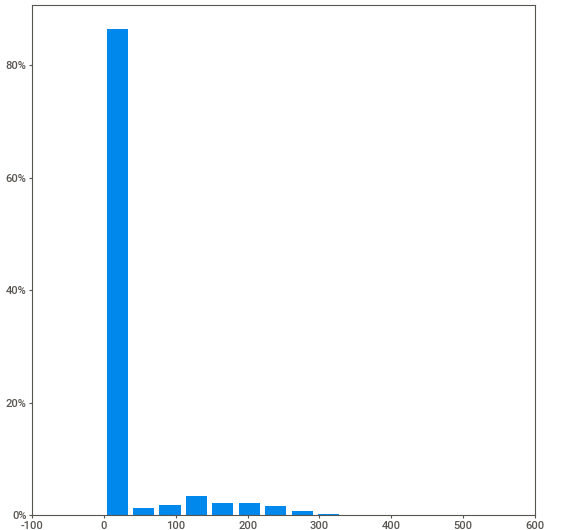
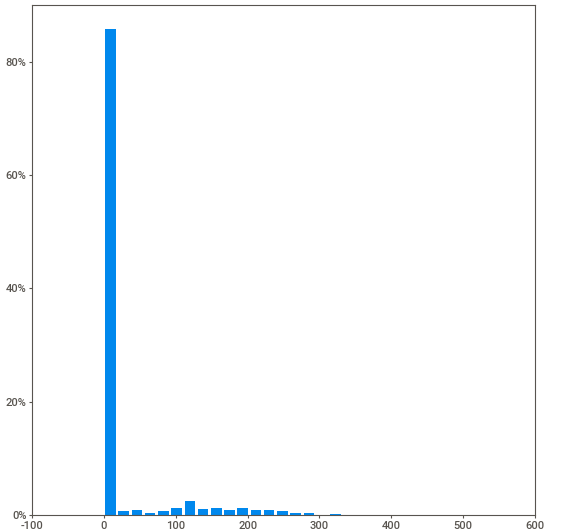
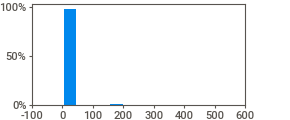
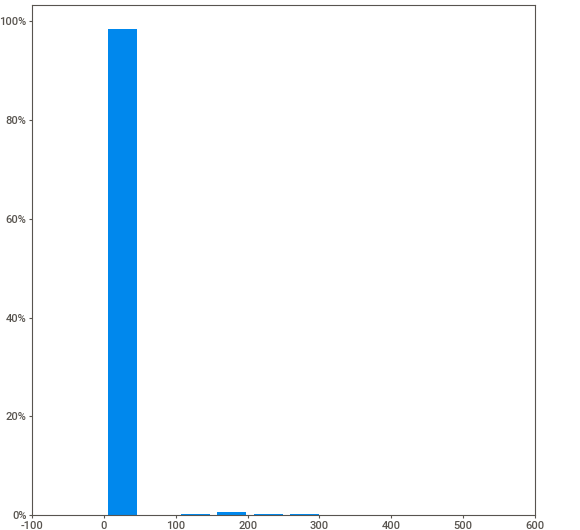
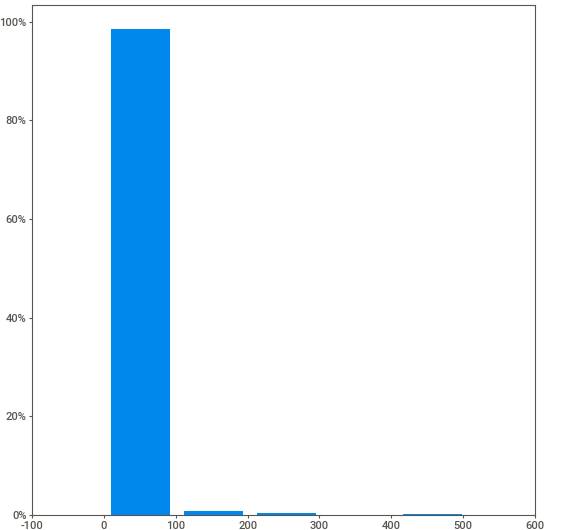
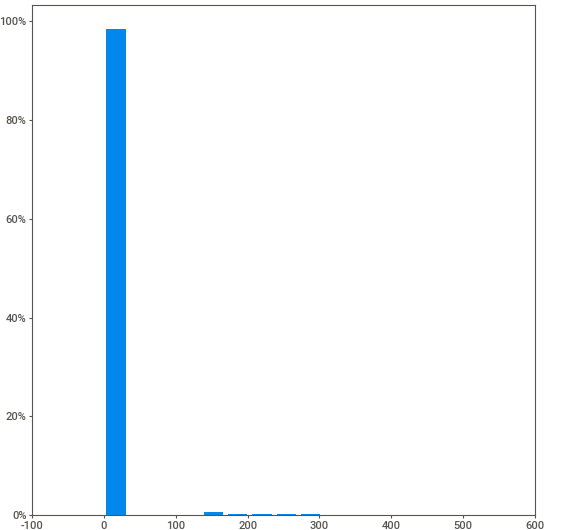
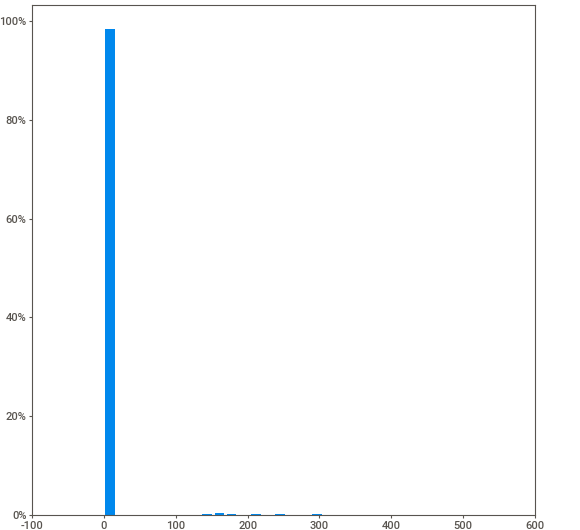
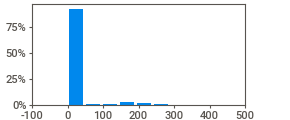
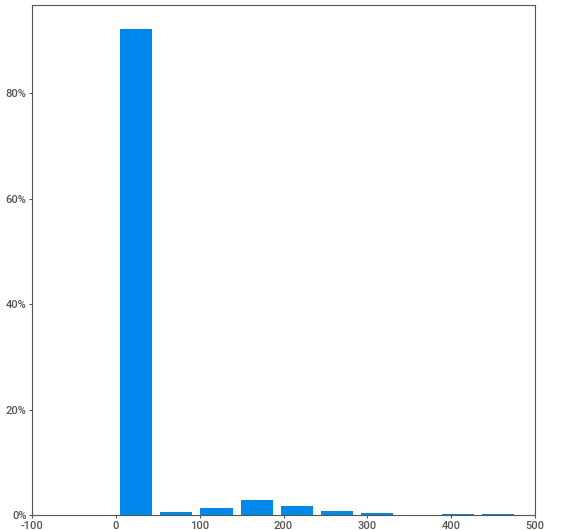
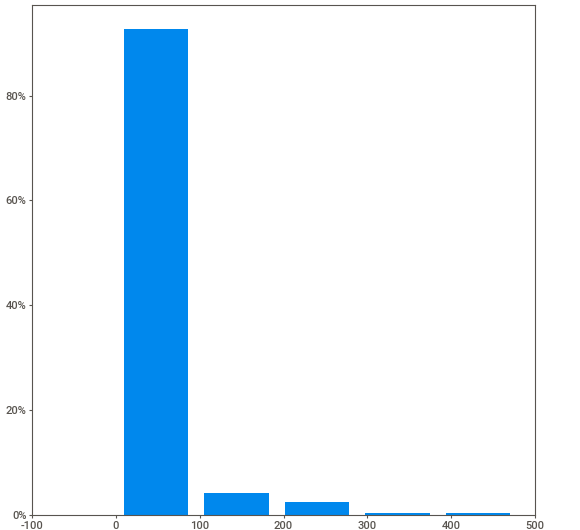
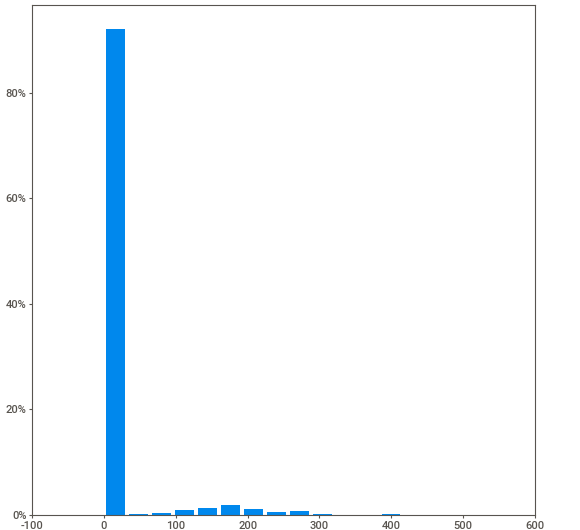
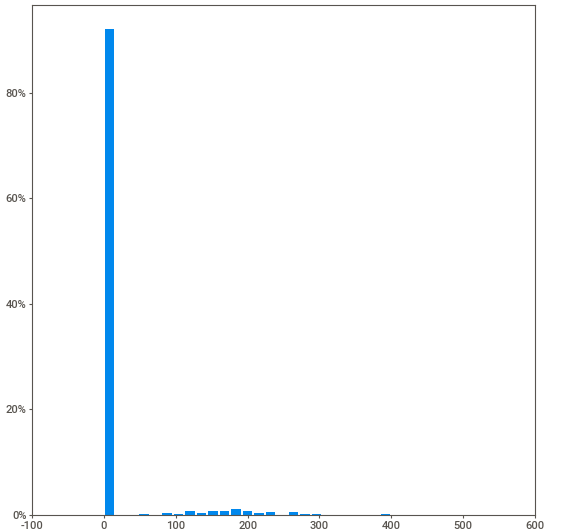
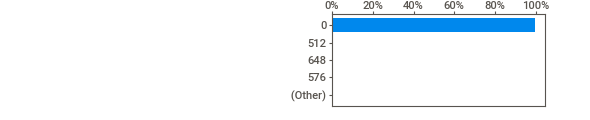
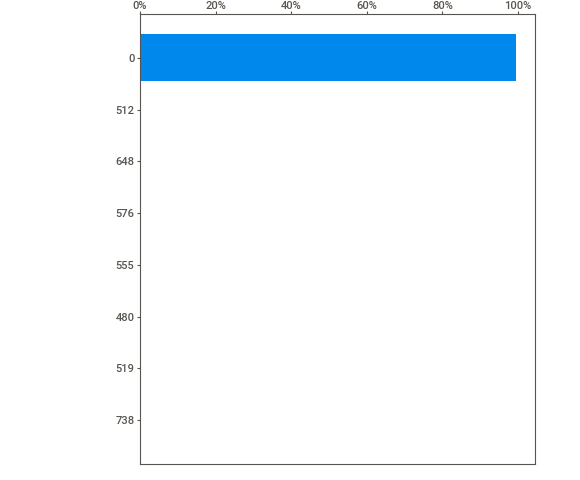
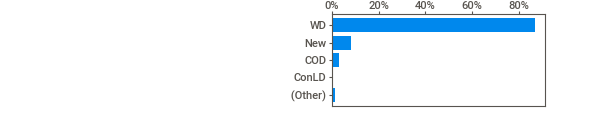
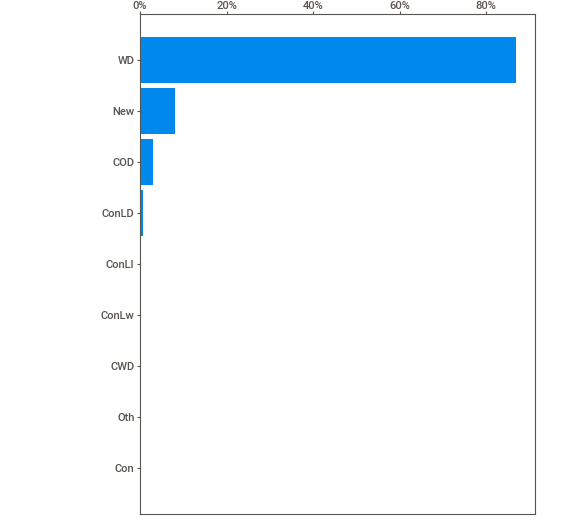
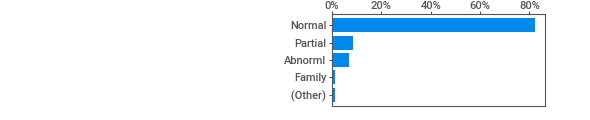
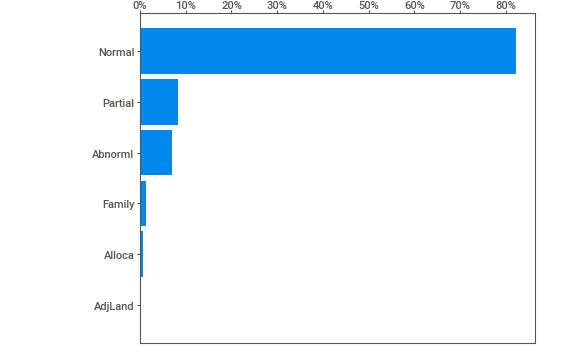
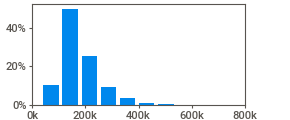
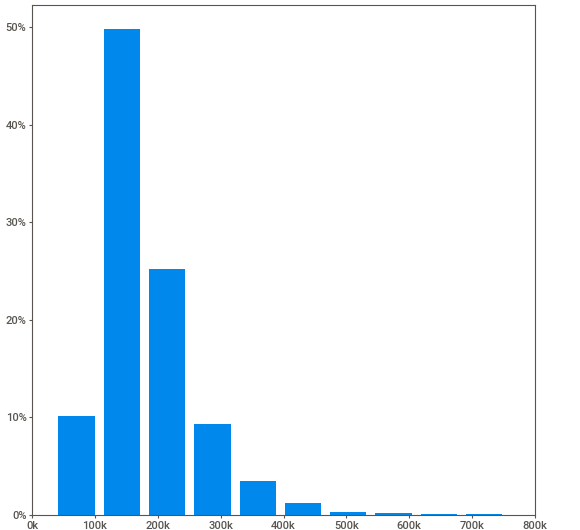
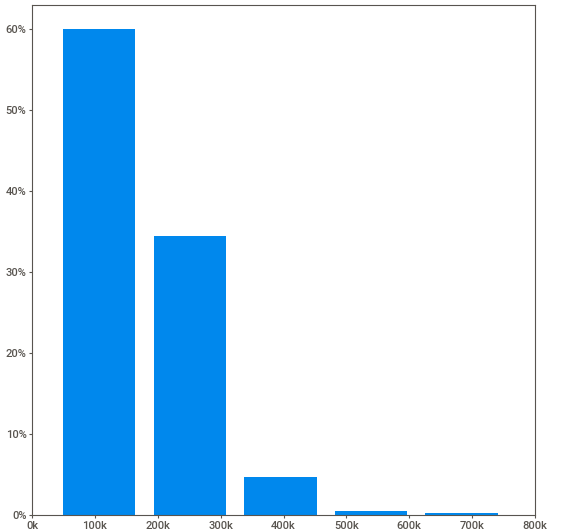
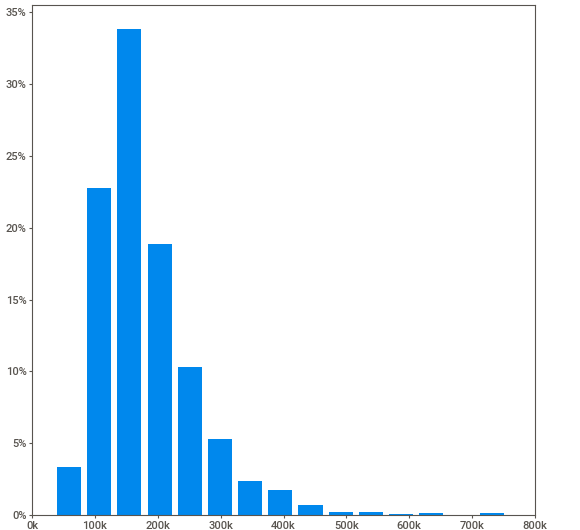
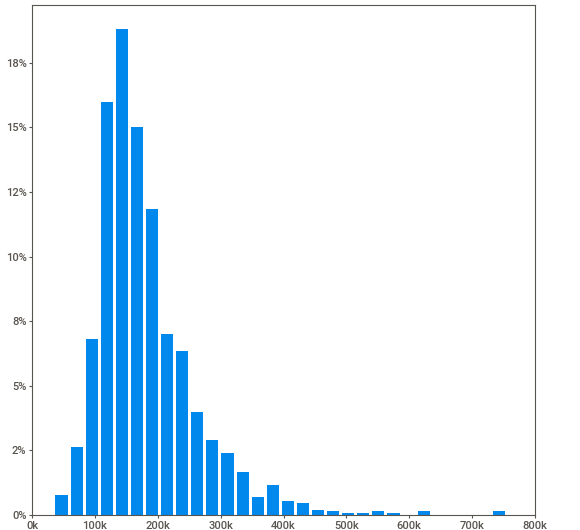
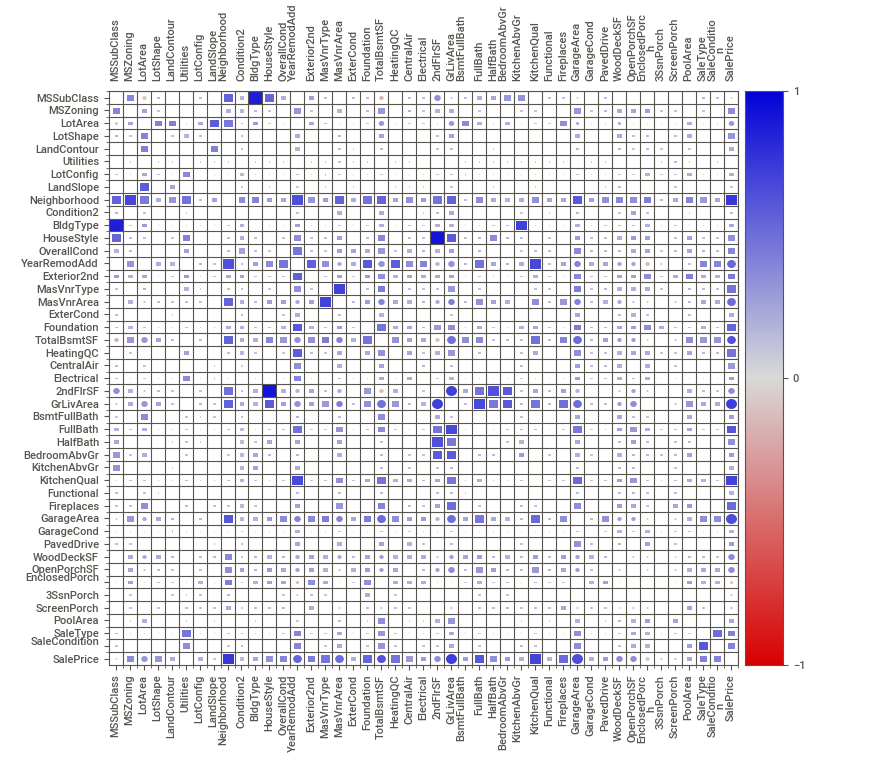
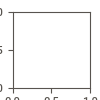

In [ ]:
import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html('analyze.html', open_browser=False)
import IPython
IPython.display.HTML('analyze.html')



> OUTCOME:

The following features were removed. 

[‘PoolArea’, ‘Utilities’, ‘LandSlope’, ‘Condition2’, ‘HouseStyle’, ‘KitchenAbvGr’, ‘GarageCond’, ‘3SsnPorch’, ‘ScreenPorch’, ‘BldgType’, ‘MSZoning’, ‘YearRemodAdd’, ‘
MasVnrArea’, ‘HalfBath’, ‘BsmtFullBath’, ‘Electrical’, ‘CentralAir’, ‘Functional’]

Reasons:
1. 2ndFloorSF correlates with HouseStyle and HalfBath
2. BldgType correlates with 2ndFloorSF and MSSubClass
3. MSZoning and YearRemodAdd  relates with neighborhood
4. MasVnrArea correlates with MasVnrType
5. BsmtFullBath correlates FullBath

The rest were dropped due to having the same values in 93% or more cases.






In [ ]:
df.drop(['PoolArea', 'Utilities', 'LandSlope', 'Condition2', 'HouseStyle', 'KitchenAbvGr', 'GarageCond', '3SsnPorch', 'ScreenPorch', 'BldgType', 'MSZoning', 'YearRemodAdd', 
'MasVnrArea', 'HalfBath', 'BsmtFullBath','Electrical', 'CentralAir', 'Functional'], axis = 1, inplace = True)



> Relationship between Categorical data and the Target Variable



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


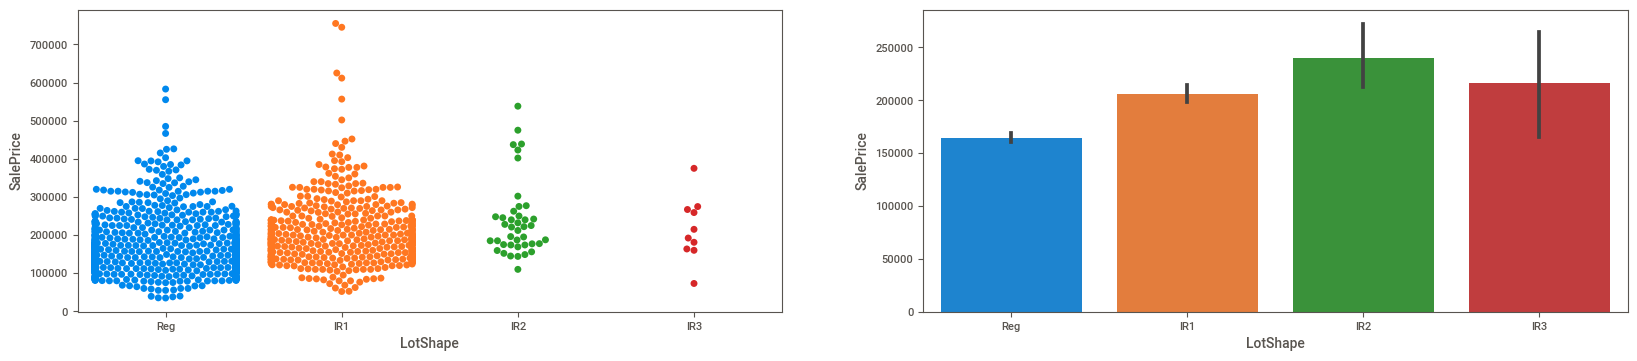

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


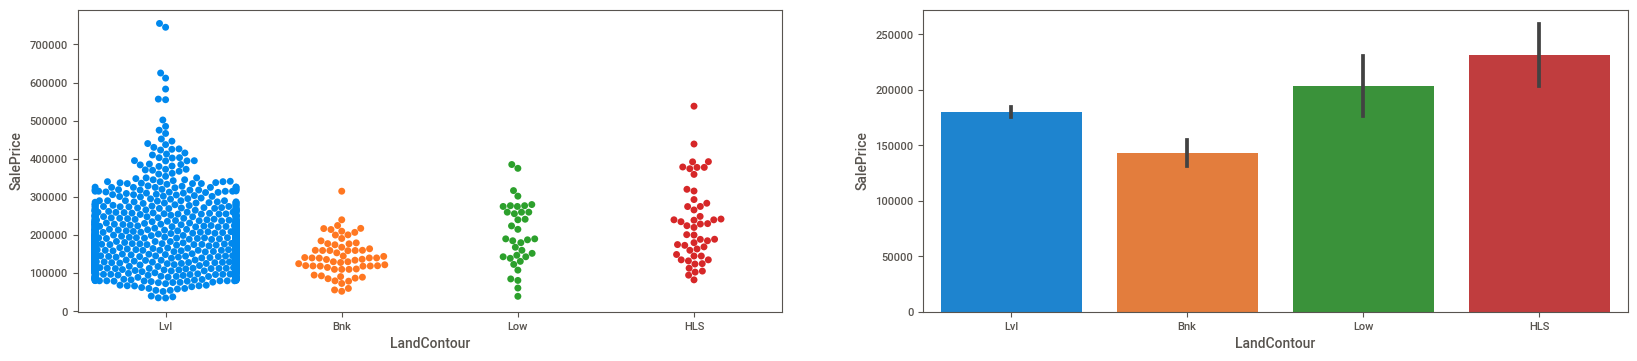

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


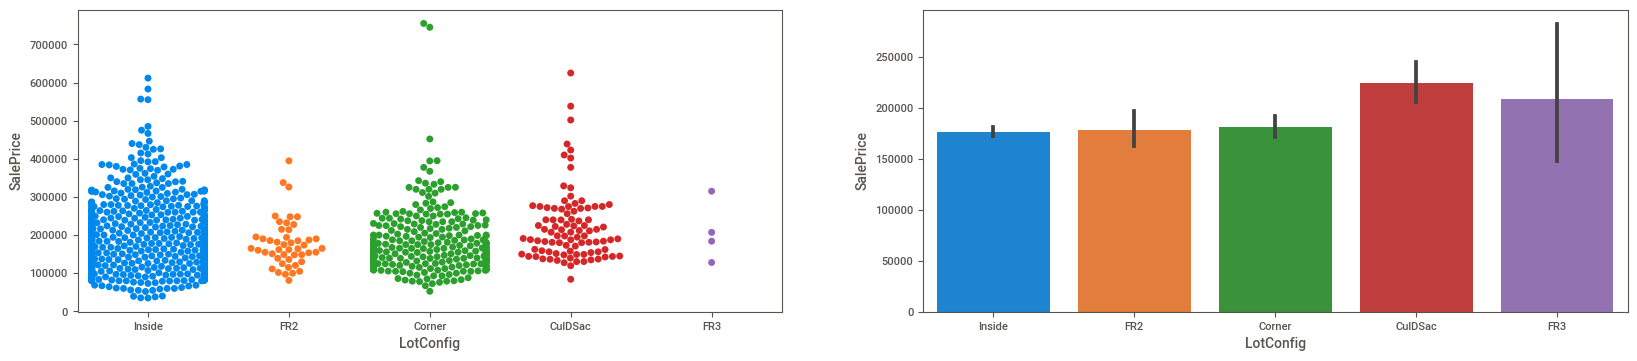

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 61.4% of the points cannot be placed; y

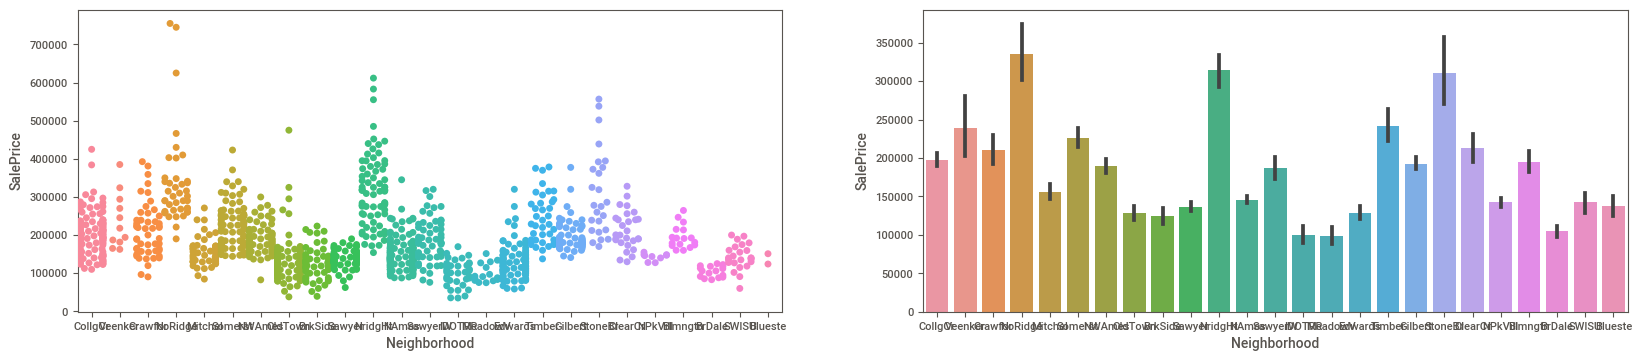

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.7% of the points cannot be placed; y

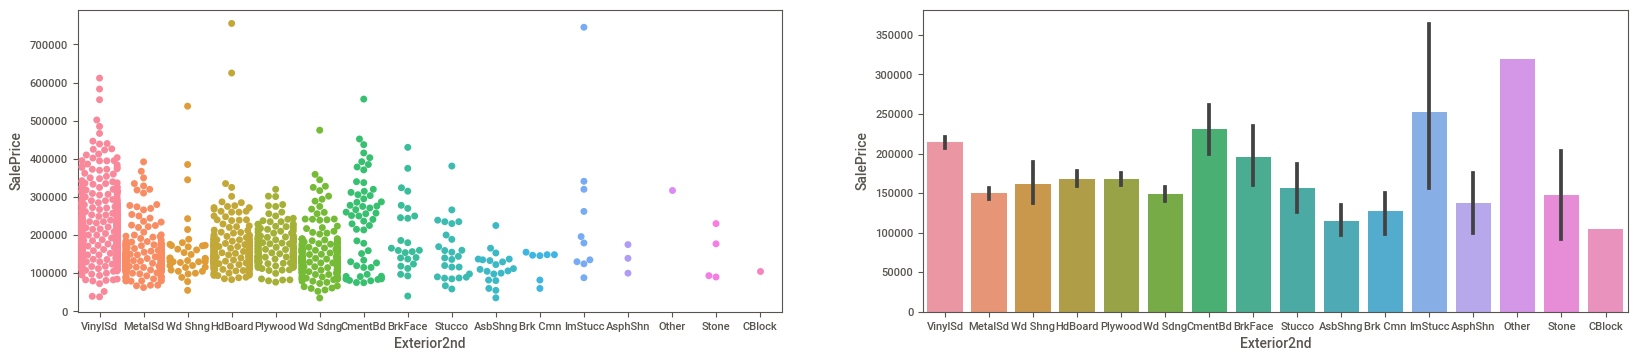

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


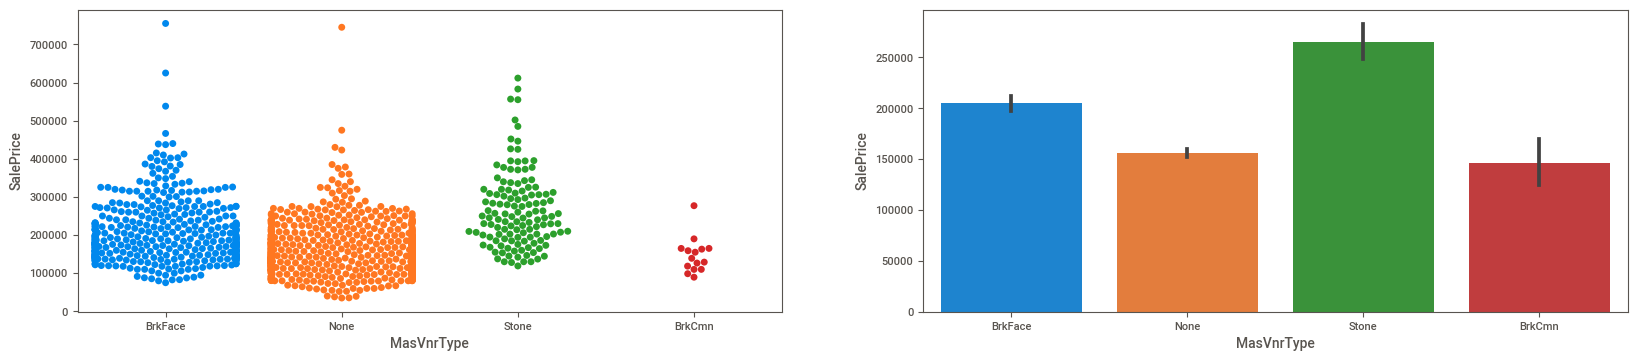

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


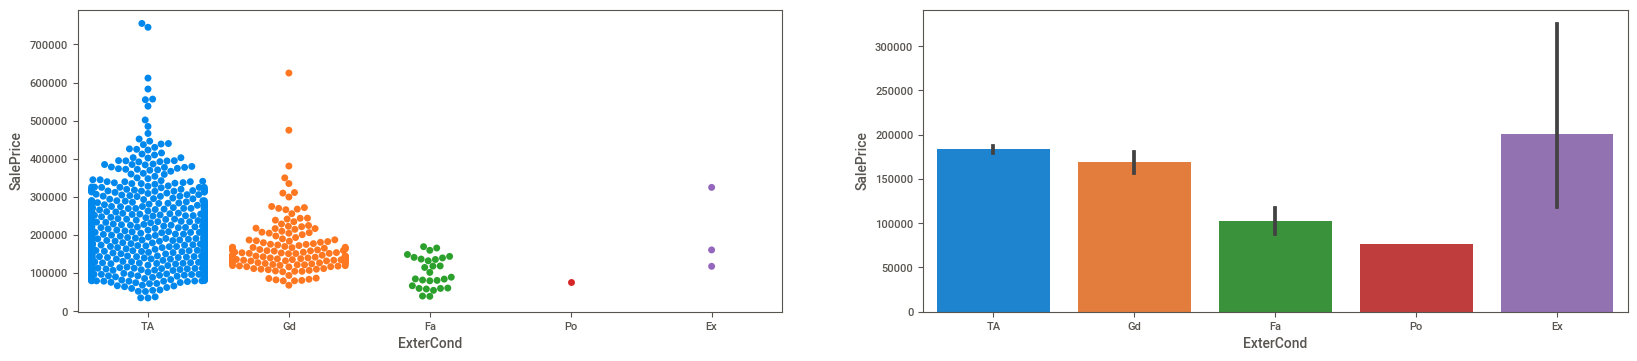

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


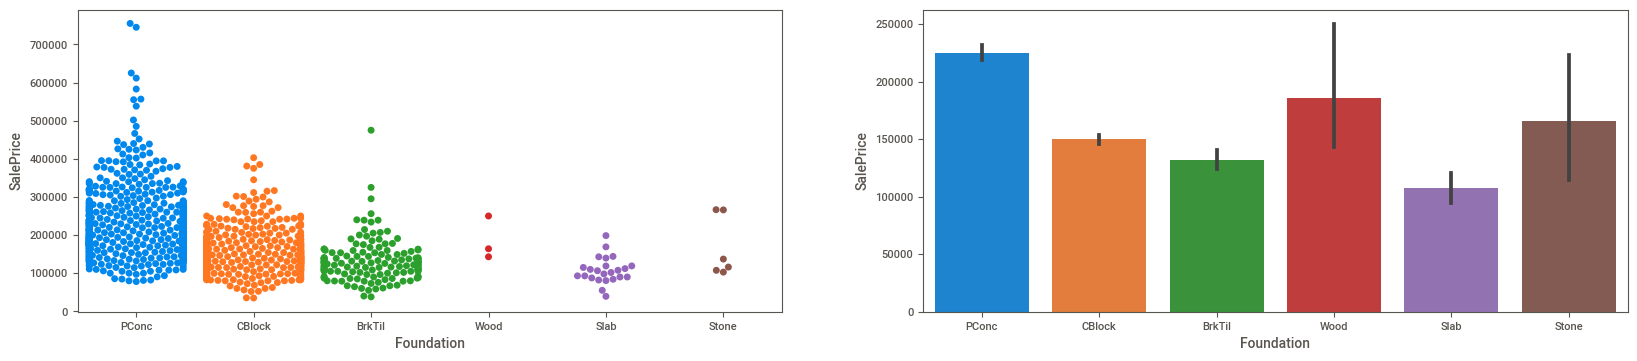

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


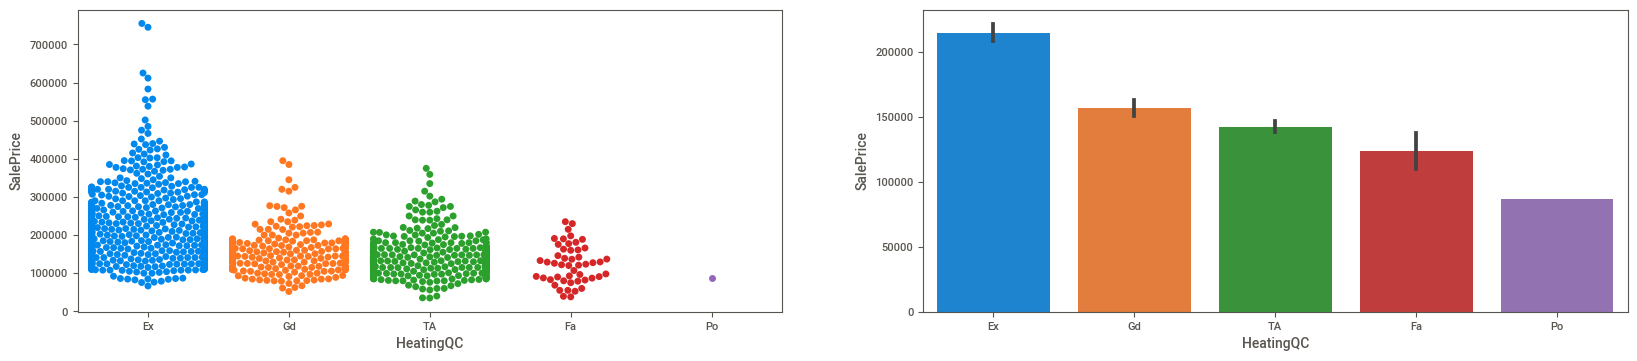

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 52.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


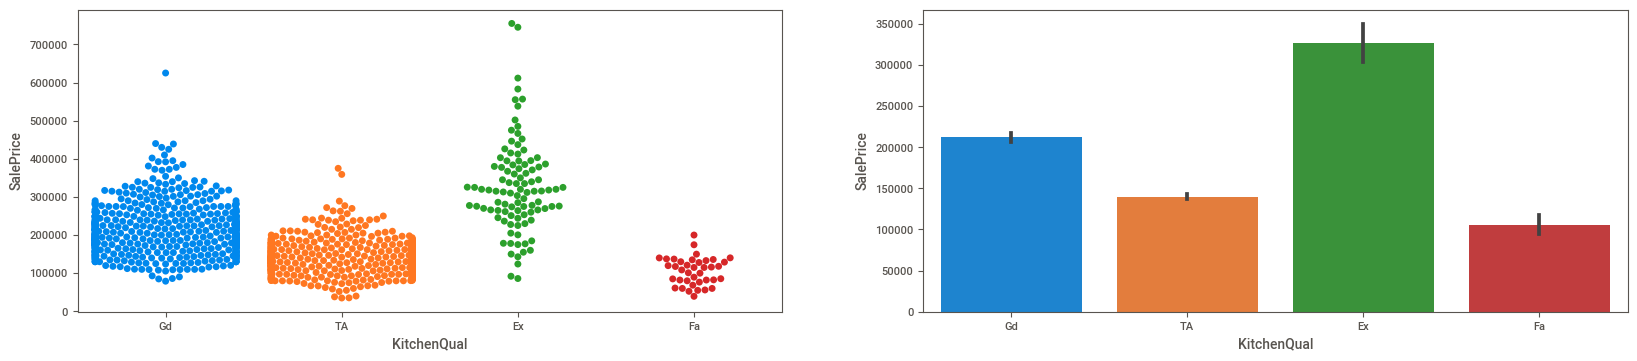

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


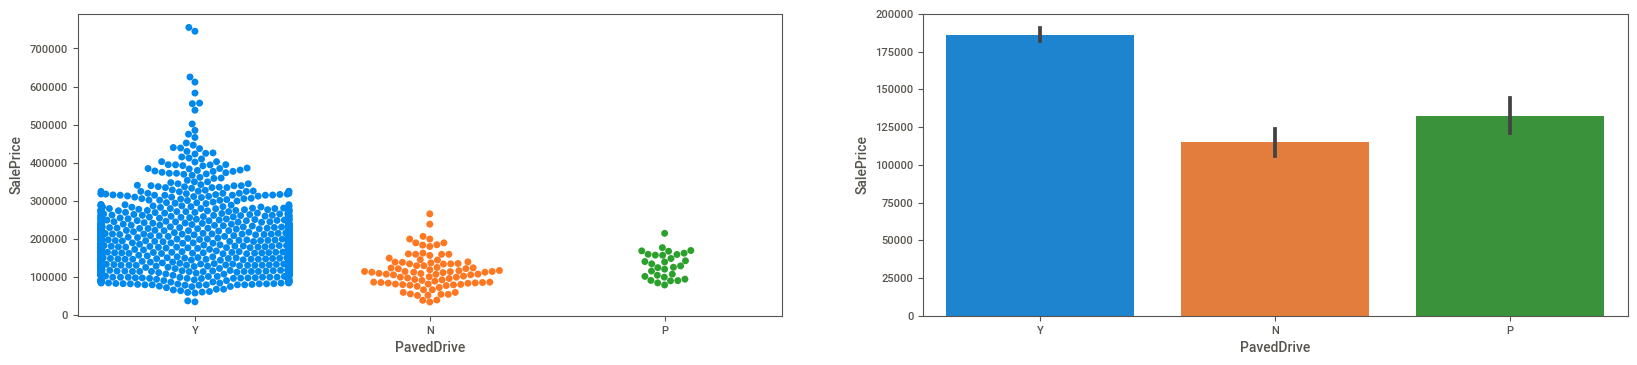

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


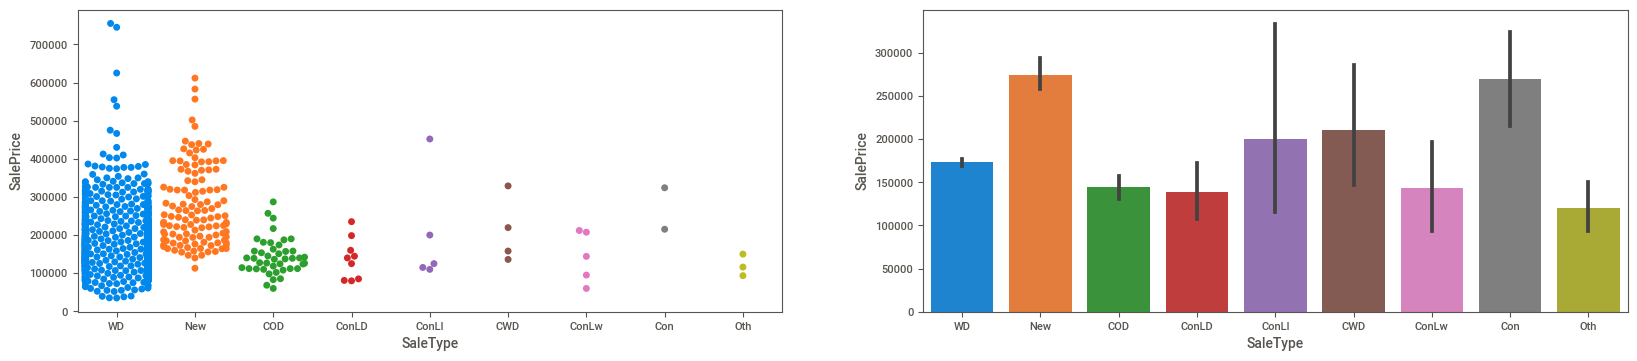

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


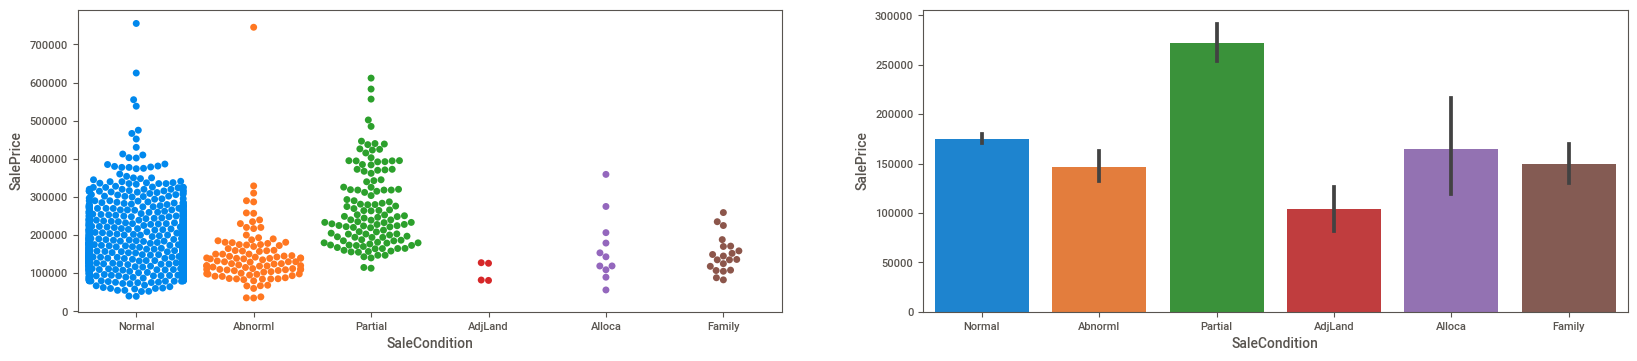

In [ ]:
for col in df.select_dtypes(exclude = np.number):
  plt.figure(figsize =( 20,4))
  
  plt.subplot(121)
  sns.swarmplot(data=df, x=df[col], y='SalePrice')

  plt.subplot(122)
  sns.barplot(data=df, x=df[col], y='SalePrice')

  plt.show()



> Numerical Data



In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(exclude=[np.number])

In [ ]:
numeric_df.columns

Index(['MSSubClass', 'LotArea', 'OverallCond', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice'],
      dtype='object')

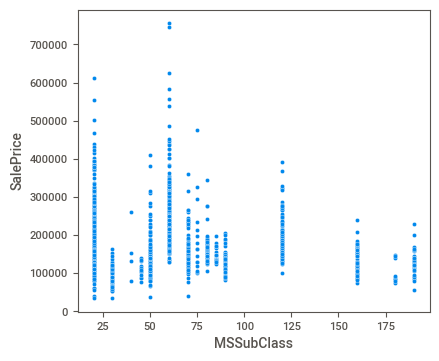

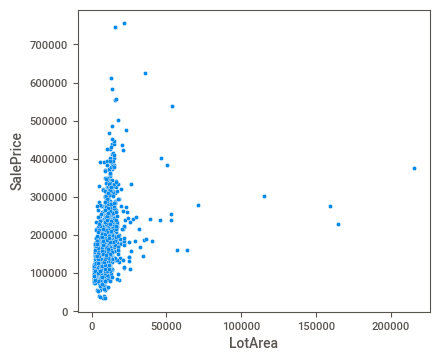

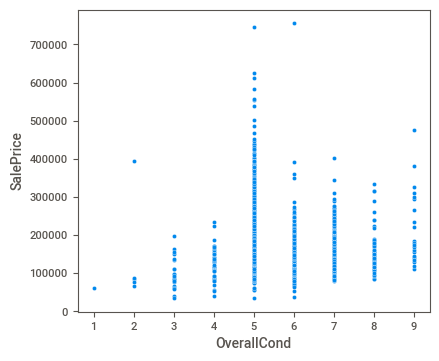

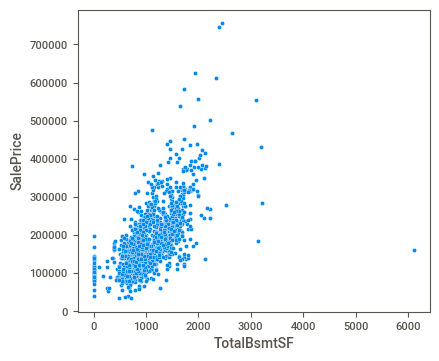

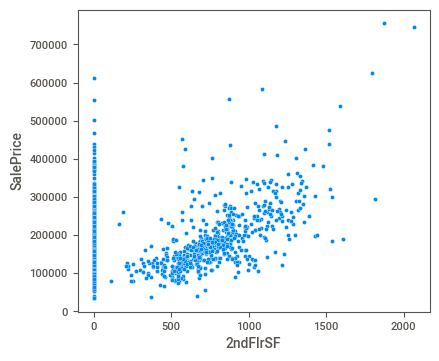

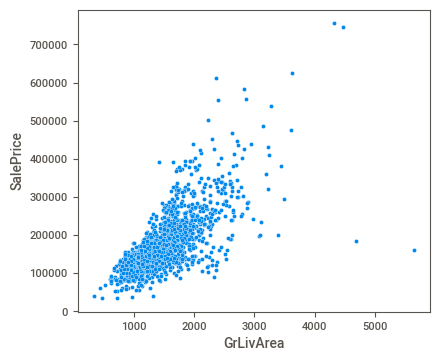

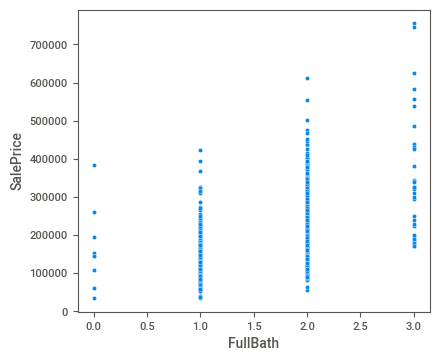

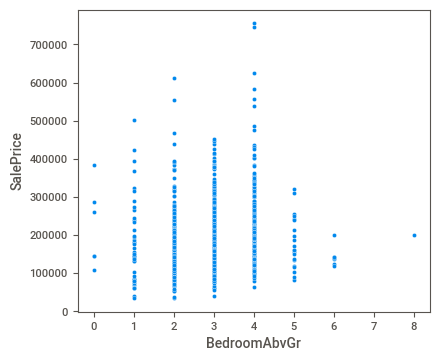

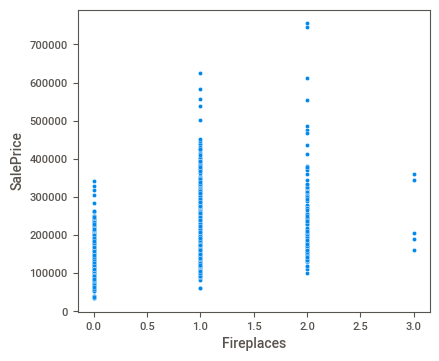

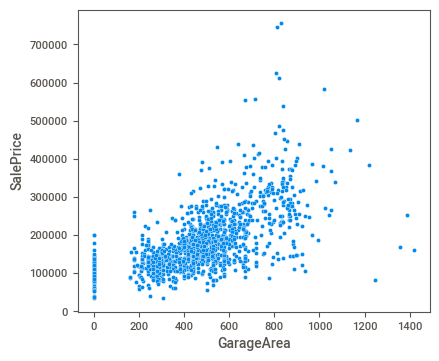

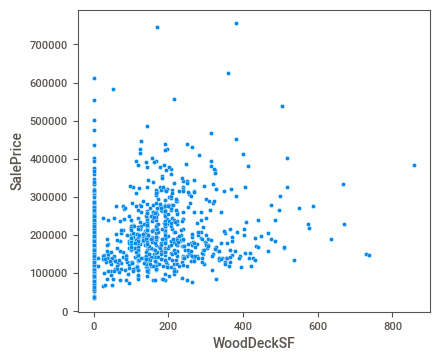

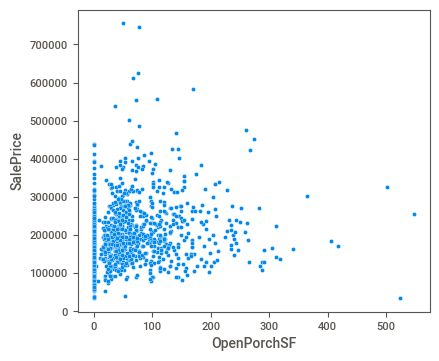

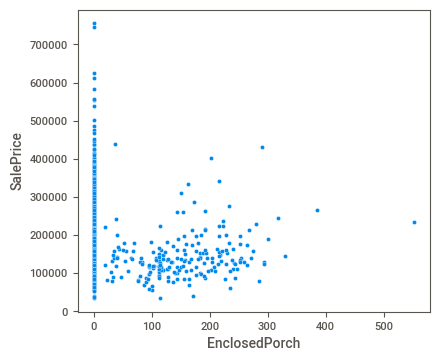

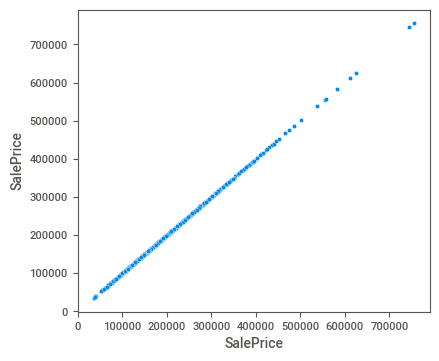

In [ ]:
for col in df.select_dtypes(include = np.number):
  plt.figure(figsize =( 10,4))
  
  plt.subplot(121)
  sns.scatterplot(data=df, x=df[col], y='SalePrice')

<Figure size 10000x10000 with 0 Axes>

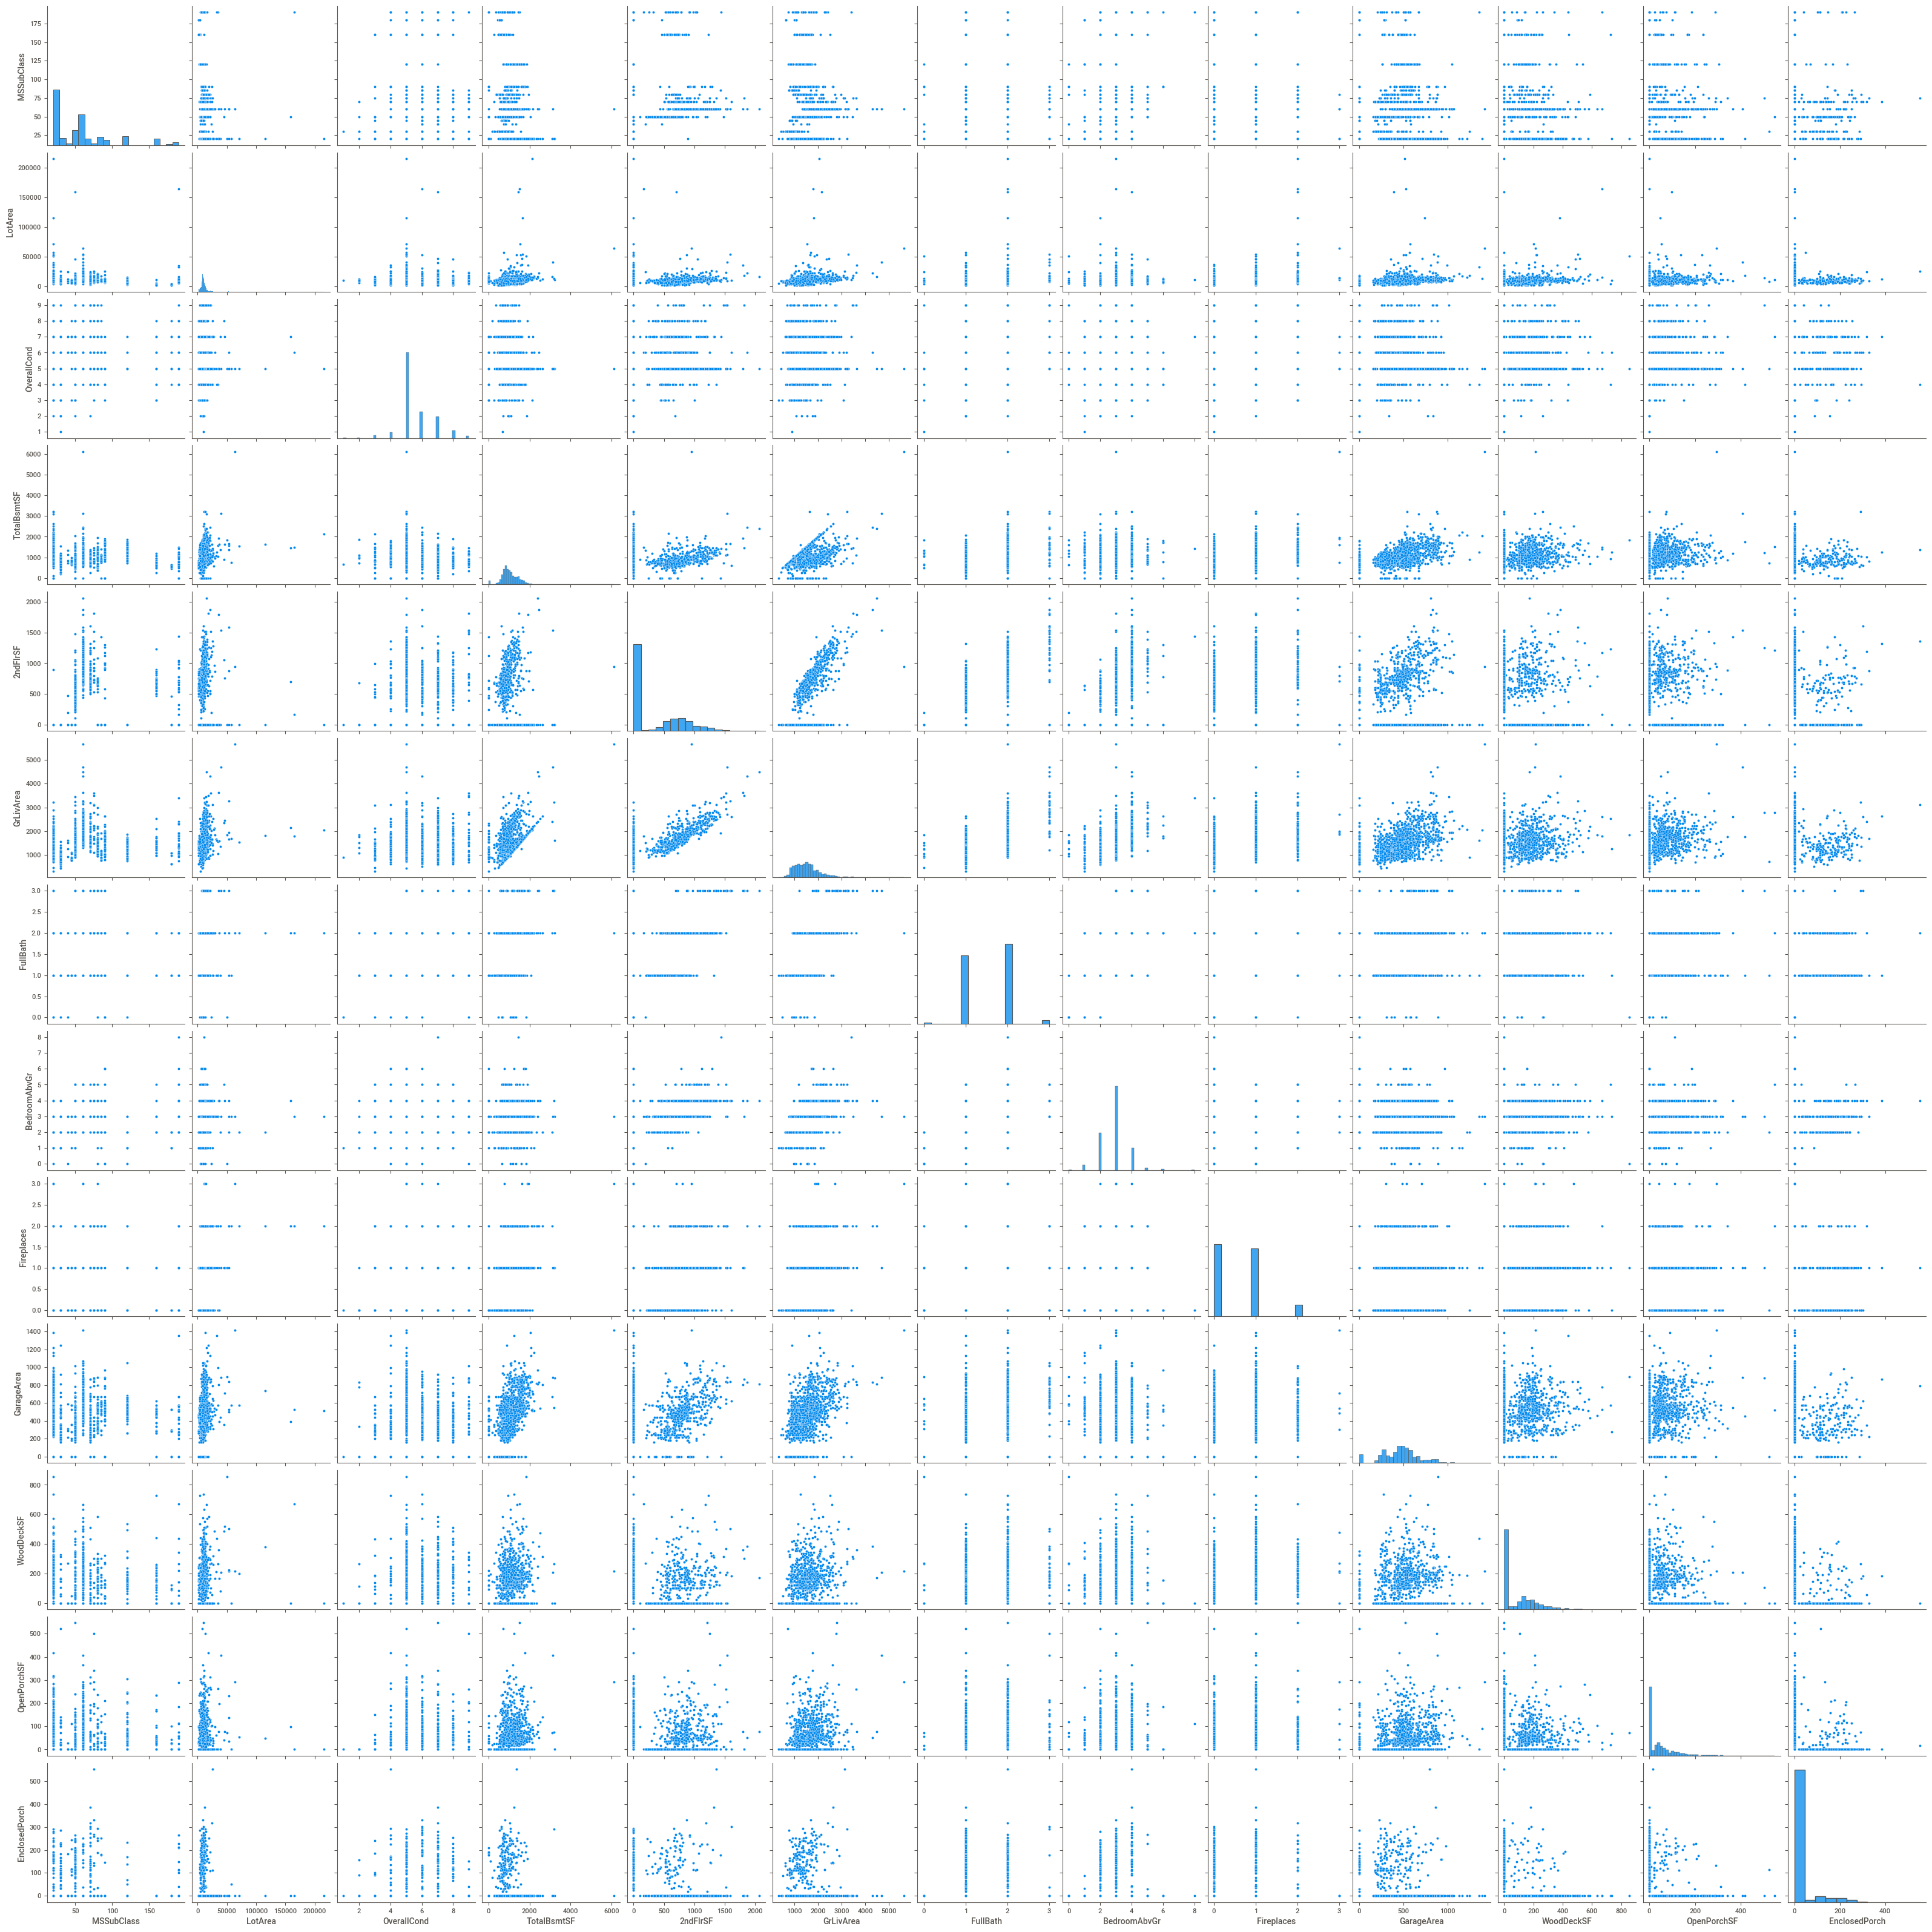

In [ ]:
plt.figure(figsize = (100,100))
sns.pairplot(df,  vars = ['MSSubClass', 'LotArea', 'OverallCond', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea',
        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'] )



> OUTCOME:


1. Regular shaped houses are the least expensive. Price increases as the house architecture becomes more and more abstract.

2. 'LandContour' has no effect on the sale price.

3. 'LotConfig' has no effect on Sale price.

4. House foundation effects price with pure concrette selling for the most.

5. 'LandSlope' has no impact either

6. Housing price varies from neighborhood to neighborhood.

7. House Exterior and Veneer have an effect on the price

8. Also, buyers prefer a good quality kitchen and driveway






1. Newer houses and new designed houses with complete construction sells for the most.

2. Houses price increases with the condition.

3. Housing price also depends on the number of bedrooms and bathrooms.

# **DEALING WITH CATEGORICAL DATA**

This dataset has Categorical Data. So, they need to be encoded. The challenge here is a lot of categorical data have some kind of relationship with them while others dont. To solve this a mixture of get_dummies and label encoding will be used.

In [ ]:
df.dtypes.value_counts()

int64     14
object    13
dtype: int64

In [ ]:
sorted(df.select_dtypes(exclude = np.number).columns)

['ExterCond',
 'Exterior2nd',
 'Foundation',
 'HeatingQC',
 'KitchenQual',
 'LandContour',
 'LotConfig',
 'LotShape',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'SaleCondition',
 'SaleType']

In [ ]:
unique = []
for col in df.select_dtypes(exclude =[np.number]):
                           uni = df[col].unique()
                           unique.append([col, uni])
unique                      

[['LotShape', array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)],
 ['LandContour', array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)],
 ['LotConfig',
  array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)],
 ['Neighborhood',
  array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
         'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
         'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
         'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
         'Blueste'], dtype=object)],
 ['Exterior2nd',
  array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
         'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
         'AsphShn', 'Other', 'Stone', 'CBlock'], dtype=object)],
 ['MasVnrType', array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)],
 ['ExterCond', array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)],
 ['Foundation',
  array(['PConc', 'CBlock', 'BrkTil', '

In [ ]:
df['ExterCond'].unique()

#Evaluates the present condition of the material on the exterior so ordinal encoding is done.

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [ ]:
scale_mapper ={'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5}
df['ExterCond'] = df['ExterCond'].replace(scale_mapper)

In [ ]:
df['HeatingQC'].unique()

#This defines the quality of heating

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [ ]:
scale_mapper ={'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5}
df['HeatingQC'] = df['HeatingQC'].replace(scale_mapper)

In [ ]:
df['KitchenQual'].unique()

#Kitchen quality

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [ ]:
scale_mapper ={'TA':2, 'Gd':3, 'Fa':1, 'Ex':4}
df['KitchenQual'] = df['KitchenQual'].replace(scale_mapper)

In [ ]:
df['PavedDrive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [ ]:
scale_mapper ={'Y' : 2, 'N' : 1, 'P' : 0}
df['PavedDrive'] = df['PavedDrive'].replace(scale_mapper)



> Get Dummies



In [ ]:
df['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [ ]:
scale_mapper ={'Normal':'Normal', 'AdjLand': 'AdjLand', 'Alloca': 'AdjLand', 'Partial' : 'Other' , 'Abnorml':'Other', 'Family':'Other' }
df['SaleCondition'] = df['SaleCondition'].replace(scale_mapper)

In [ ]:
unique = []
for col in df.select_dtypes(exclude =[np.number]):
                           uni = df[col].unique()
                           unique.append([col, uni])
unique    

[['LotShape', array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)],
 ['LandContour', array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)],
 ['LotConfig',
  array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)],
 ['Neighborhood',
  array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
         'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
         'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
         'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
         'Blueste'], dtype=object)],
 ['Exterior2nd',
  array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
         'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
         'AsphShn', 'Other', 'Stone', 'CBlock'], dtype=object)],
 ['MasVnrType', array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)],
 ['Foundation',
  array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)],
 ['SaleType',
  array(['WD',

In [ ]:
df = pd.get_dummies(df, drop_first = True)

In [ ]:
X =  df.drop(['SalePrice'], axis = 1)
y = df['SalePrice']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
# scaler = StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print('Intercept is ', model.intercept_)

# For retrieving the slope (coefficient of x). This will be an array of values.
print("Slope i.e. coefficient of x is ", model.coef_)

Intercept is  -36211.224617631495
Slope i.e. coefficient of x is  [-1.69277387e+02  4.17335447e-01  6.21681694e+03 -3.42986815e+03
  1.69414245e+01  7.63365896e+01  2.33966630e+00  4.89980248e+01
  3.44625326e+03 -2.95059189e+03  1.49858893e+04  1.08118933e+04
  2.85382338e+01  5.59395759e+03  1.89936572e+01  1.59105312e+01
 -7.52311563e-01  8.90818259e+03 -4.37413694e+04  2.28624086e+03
  2.81740262e+04  2.43895661e+04  1.27182287e+04  1.50423044e+04
 -7.30742983e+03 -5.73698552e+03  2.35722757e+03  1.24914989e+04
 -2.20295461e+03 -6.37777405e+03  9.61410816e+01  5.39386548e+03
  1.26704016e+04 -1.88706879e+04  2.53003268e+03 -2.20790222e+04
 -2.44867980e+04 -5.78565768e+03 -1.10655416e+04  1.99734904e+04
 -2.87862292e+03  5.87074821e+04  6.44275596e+04 -2.41081366e+04
 -1.72866325e+04 -8.10598254e+03  5.11031063e+03  2.04054992e+04
  7.14841778e+04  1.90971074e+04  3.29492645e+04  1.66946415e+04
 -1.81495923e+03  1.95663331e+04 -1.23023590e+04  2.25341816e+04
  1.80524386e+03  8.0305

In [ ]:
y_predict = model.predict(X_test)

rmse_simple_linear = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Square Error is ', rmse_simple_linear)

# MSE_Log
rmse_log_simple_linear = np.sqrt(mean_squared_log_error(y_test, y_predict))
print('Root Mean Square Log Error is ', rmse_log_simple_linear)

print('Coefficient of determination (R^2): ', r2_score(y_test, y_predict))

Root Mean Square Error is  38016.28628500358
Root Mean Square Log Error is  0.18782519744796275
Coefficient of determination (R^2):  0.8045715747964407


# **Lets check the feature importance**




In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

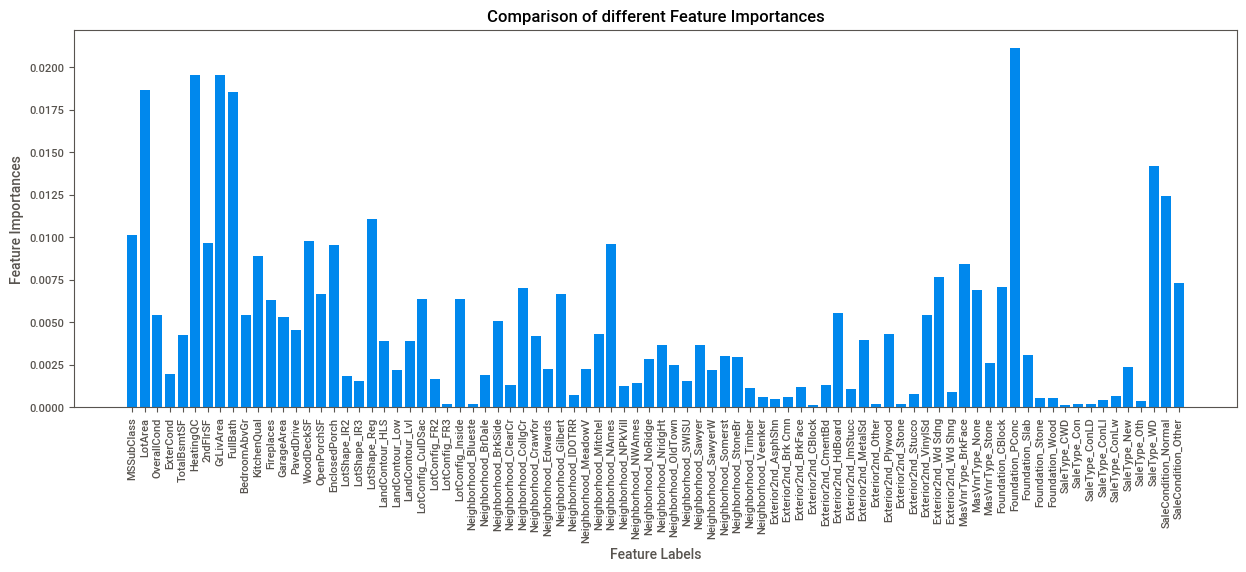

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.xticks(rotation = 90);
plt.show()




> Important Features:
1. LotArea:Lot Area
2. HeatingQC: Quality
3. GrLivArea: Above grade (ground) living area square feet
4. FullBath: Number of Full Bathrooms
5. Foundation_PConc: Houses with poured concrete foundation
6. SaleTypeWd: Warranty Deed - Conventional
6. SaleCondition_Normal

